#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Sentiment Analysis`

#### Group 10:
- `Adriana Pinto - 20221921`
- `David Duarte - 20221899`
- `Maria Teresa Silva - 20221821`
- `Marta Alves - 20221890`
- `Miguel Nascimento - 20221876`


#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [1.1 Imports](#P41)
    - [1.2 Initial Information](#P42)
    - [1.3 Data Treatment](#P43)
    - [1.4 Sentiment Analysis](#P43)
        - [1.4.1 VADER](#P43)
        - [1.4.2 TextBlob](#P43)
        - [1.4.3 Normalize Values](#P43)
        - [1.4.4 Visualization of VADER and TextBlob](#P43)
        - [1.4.5 WordClouds of Sentiment](#P43)
        - [1.4.6 Rating VS Polarity](#P43)
    - [1.5 Further Analysis](#P43)
        - [1.5.1 By Cost](#P43)
            - [1.5.1.1 Most Expensive Restaurant](#P43)
            - [1.5.1.2 Cheapest Restaurant](#P43)
        - [1.5.2 By Cuisine Type](#P43)
        - [1.5.3 By Average Rating](#P43)
            - [1.5.3.1 Top 10 Best Restaurants](#P43)
            - [1.5.3.2 Top 10 Worst Restaurants](#P43)
        - [1.5.4 By defined Flags](#P43)
    - [1.6 Modeling](#P43)
    - [1.7 Conclusion](#P43)

<font color='#BFD72F' size=5>1.1 Imports</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In the following cell, we imported the needed packages for the Sentiment Analysis.

In [1]:
import pandas as pd
import nltk
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from utils.preproc_utils import *
from utils.graphs import *
from nltk.tokenize import PunktSentenceTokenizer
from sklearn.preprocessing import MinMaxScaler

#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

#Sentiment Analysis with VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentiment Analysis with TextBlob
from textblob import TextBlob

#Regression Metrics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

<font color='#BFD72F' size=5>1.2 Initial Information</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

To start, we took the necessary columns from the reviews dataset, and checked for missing values and distributions.

In [2]:
reviews = pd.read_pickle('data/reviews_initial_preproc.pkl')
reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  N_reviews  Followers  Month  Year  Weekend  \
0 2019-05-25 15:54:00         0          1          2      5  2019        1   
1 2019-05-25 14:20:00         0          3          2      5  2019        1   
2 2019-05-24 22:54:00         0          2          3      5  2019        0   
3 2019-05-24 22:11:00         0          1          1      5  2019        0   
4 2019-05-24 21:37:00         0          3          2      5  2019        0   

   Post_Meal  rev_len  nr_sents  
0          1      224         5  
1          1      144         5  
2          1      189         3  
3          1      148         2  
4          1      160         6

In [3]:
reviews_content = reviews[['Review', 'Rating', 'Restaurant', 'Weekend', 'Post_Meal']]
reviews_content.sample(5)

Review  Rating  \
7837  Amazing food. Tikki is a must try and dahi ki ...     5.0   
7299  Seems like your in a classic movie from the 60...     4.5   
7329  I was here with my bunch of friends a few days...     4.0   
7129  Pretty average fare.. tried the paneer lababda...     3.0   
8762  As it's name suggests the wings are mouth wate...     5.0   

               Restaurant  Weekend  Post_Meal  
7837           Khaan Saab        0          1  
7299              Labonel        0          0  
7329          Driven Cafe        1          1  
7129    Eat India Company        0          1  
8762  American Wild Wings        0          0

In [4]:
reviews_content.describe()

Rating     Weekend    Post_Meal
count  9955.000000  9955.00000  9955.000000
mean      3.600402     0.35781     0.538322
std       1.483565     0.47938     0.498554
min       1.000000     0.00000     0.000000
25%       3.000000     0.00000     0.000000
50%       4.000000     0.00000     1.000000
75%       5.000000     1.00000     1.000000
max       5.000000     1.00000     1.000000

In [5]:
reviews_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      9955 non-null   object 
 1   Rating      9955 non-null   float64
 2   Restaurant  9955 non-null   object 
 3   Weekend     9955 non-null   int64  
 4   Post_Meal   9955 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 466.6+ KB


In [30]:
review_text = reviews_content.Review.sample(1).values[0]
review_text

Fine baking it is! Place looks classy. It is expensive for a takeaway. Staff at the counter was not very warm. Cupcakes are good especially the chocolate ones. Only drawback is they let you buy in specific flavours and quantities and you don't get to pick and choose your favorite ones. Berry crumble loaf is one of my favorites.


From the cells above, we conclude that there are no missing values and reviews that are composed by more than one sentence.

<font color='#BFD72F' size=5>1.3 Data Treatment</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

We then applied a preprocessing pipeline seen in class to the reviews to create two new columns: one with the fully preprocessed content (preproc_content) and another with tokenized and preprocessed sentences (tokenized_sentences), preserving emojis and punctuation in both cases.

In [40]:
reviews_content.head()

Review  Rating       Restaurant  \
0  The ambience was good, food was quite good . h...     5.0  Beyond Flavours   
1  Ambience is too good for a pleasant evening. S...     5.0  Beyond Flavours   
2  A must try.. great food great ambience. Thnx f...     5.0  Beyond Flavours   
3  Soumen das and Arun was a great guy. Only beca...     5.0  Beyond Flavours   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0  Beyond Flavours   

   Weekend  Post_Meal  
0        1          1  
1        1          1  
2        0          1  
3        0          1  
4        0          1

In [42]:
reviews_content["preproc_content"] =\
      reviews_content["Review"].map(lambda content: main_pipeline(
          content,
          no_stopwords=True,
          exception_stopwords=['no', 'not', 'nor', 'very', 'few', 'all', 'again', 'but'],
          convert_diacritics=False,
          lowercase=False,
          lemmatized=False,
          tokenized_output=False,
          no_emojis=False, 
          no_punctuation=False,
          no_contractions = True
      ))

reviews_content.head()

Review  Rating       Restaurant  \
0  The ambience was good, food was quite good . h...     5.0  Beyond Flavours   
1  Ambience is too good for a pleasant evening. S...     5.0  Beyond Flavours   
2  A must try.. great food great ambience. Thnx f...     5.0  Beyond Flavours   
3  Soumen das and Arun was a great guy. Only beca...     5.0  Beyond Flavours   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0  Beyond Flavours   

   Weekend  Post_Meal                                    preproc_content  
0        1          1  ambience good, food quite good . Saturday lunc...  
1        1          1  Ambience good pleasant evening . Service very ...  
2        0          1  must try .. great food great ambience . Thnx s...  
3        0          1  Soumen das Arun great guy . behavior sincerety...  
4        0          1  Food good.we ordered Kodi drumsticks basket mu...

In [43]:
sent_tokenizer = PunktSentenceTokenizer()

reviews_content["tokenized_sentences"] =\
      reviews_content["Review"].map(lambda content : [main_pipeline(sentence,
                                                                  no_emojis = False,
                                                                  no_stopwords = True,
                                                                  exception_stopwords=['no','not','nor','very','few','all','again','but'],
                                                                  convert_diacritics = False, 
                                                                  lowercase = False, 
                                                                  lemmatized = False,
                                                                  no_punctuation = False,
                                                                  no_contractions = True)
                                                                  for sentence in sent_tokenizer.tokenize(content)])

reviews_content.head()

Review  Rating       Restaurant  \
0  The ambience was good, food was quite good . h...     5.0  Beyond Flavours   
1  Ambience is too good for a pleasant evening. S...     5.0  Beyond Flavours   
2  A must try.. great food great ambience. Thnx f...     5.0  Beyond Flavours   
3  Soumen das and Arun was a great guy. Only beca...     5.0  Beyond Flavours   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0  Beyond Flavours   

   Weekend  Post_Meal                                    preproc_content  \
0        1          1  ambience good, food quite good . Saturday lunc...   
1        1          1  Ambience good pleasant evening . Service very ...   
2        0          1  must try .. great food great ambience . Thnx s...   
3        0          1  Soumen das Arun great guy . behavior sincerety...   
4        0          1  Food good.we ordered Kodi drumsticks basket mu...   

                                 tokenized_sentences  
0  [ambience good, food quite good., Saturday lun...  
1  [Ambience good pleasant evening., Service very...  
2  [must try .. great food great ambience., Thnx ...  
3  [Soumen das Arun great guy., behavior sinceret...  
4  [Food good.we ordered Kodi drumsticks basket m...

In [48]:
random_index = reviews_content.sample(1).index[0]

# Access the same example for both columns
example_tokenized = reviews_content.loc[random_index, 'tokenized_sentences']
example_preproc = reviews_content.loc[random_index, 'preproc_content']
example_review = reviews_content.loc[random_index, 'Review']

print("Review Example:", example_review)
print("\nPreprocessed Example:", example_preproc)
print("\nTokenized Example:", example_tokenized)

Review Example: Fine baking it is! Place looks classy. It is expensive for a takeaway. Staff at the counter was not very warm. Cupcakes are good especially the chocolate ones. Only drawback is they let you buy in specific flavours and quantities and you don't get to pick and choose your favorite ones. Berry crumble loaf is one of my favorites.

Preprocessed Example: Fine baking! Place looks classy . expensive takeaway . Staff counter not very warm . Cupcakes good especially chocolate ones . drawback let buy specific flavours quantities not get pick choose favorite ones . Berry crumble loaf one favorites.

Tokenized Example: ['Fine baking!', 'Place looks classy.', 'expensive takeaway.', 'Staff counter not very warm.', 'Cupcakes good especially chocolate ones.', 'drawback let buy specific flavours quantities not get pick choose favorite ones.', 'Berry crumble loaf one favorites.']


The functions seemed to work, so we proceeded with the Sentiment Analysis.

<font color='#BFD72F' size=5>1.4 Sentiment Analysis</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In this part, we conducted Sentiment Analysis on the reviews using both VADER and TextBlob to compare their accuracy in determining sentiment polarity. The goal of sentiment analysis is to identify the emotions or opinions expressed in the reviews, helping us better understand customer satisfaction and preferences. By evaluating both methods, we aim to find the most effective approach for this dataset.

<font color='#BFD72F' size=4>1.4.1 VADER</font> <a class="anchor" id="P15"></a>

In [49]:
vader = SentimentIntensityAnalyzer()

In [50]:
sent_compound_list = []

for sentence in example_tokenized:
    sent_polarity = vader.polarity_scores(sentence)
    sent_compound_list.append(sent_polarity["compound"])
    print("{} : \n {}".format(sentence, sent_polarity))

Fine baking! : 
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2714}
Place looks classy. : 
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
expensive takeaway. : 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Staff counter not very warm. : 
 {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.2222}
Cupcakes good especially chocolate ones. : 
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
drawback let buy specific flavours quantities not get pick choose favorite ones. : 
 {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.4588}
Berry crumble loaf one favorites. : 
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}


In [51]:
print(sent_compound_list)
mean_compound = sum(sent_compound_list) / len(sent_compound_list)
print("Mean Compound Value:", mean_compound)

[0.2714, 0.4404, 0.0, -0.2222, 0.4404, 0.4588, 0.4215]
Mean Compound Value: 0.2586142857142857


In [52]:
preproc_contet_polarity = vader.polarity_scores(example_preproc)
preproc_contet_polarity

{'neg': 0.043, 'neu': 0.639, 'pos': 0.318, 'compound': 0.9016}

In [53]:
example_preproc_rating = reviews_content.loc[random_index, 'Rating']
example_preproc_rating

4.5

After testing several examples, we found that VADER's compound score is more reliable, as it closely aligns with the true sentiment of the reviews, providing a clearer reflection of their overall tone, so we decided to apply VADER to the entire review.

In [54]:
def vader_wrapper(user_review):    
    if type(user_review) == list:
        sent_compound_list = []
        for sentence in user_review:
            sent_compound_list.append(vader.polarity_scores(sentence)["compound"])
        polarity = np.array(sent_compound_list).mean()
    else:
        polarity = vader.polarity_scores(user_review)["compound"]
    return polarity

In [55]:
reviews_content["content_polarity_vader"] = reviews_content["preproc_content"].map(lambda review: vader_wrapper(review))
reviews_content["mean_sentence_polarity_vader"] = reviews_content["tokenized_sentences"].map(lambda review: vader_wrapper(review))

In [56]:
reviews_content.sample(5)

Review  Rating  \
7160  Worst food ever..... Very bad taste, i will gi...     1.0   
3694  I frequently visit this place only for lunch b...     4.0   
7636  Good food and ambience, loved the beach tables...     4.0   
889   Situated at the top floor of SLN terminus alon...     3.0   
837   They have worst north indian food i believe. S...     3.0   

                               Restaurant  Weekend  Post_Meal  \
7160                    Eat India Company        1          1   
3694  Banana Leaf Multicuisine Restaurant        0          1   
7636        The Old Madras Baking Company        0          1   
889                           Hyper Local        1          1   
837                           Hyper Local        0          0   

                                        preproc_content  \
7160  Worst food ever ..... Very bad taste, give neg...   
3694  frequently visit place lunch buffet good food,...   
7636  Good food ambience, loved beach tables chairs ...   
889   Situated top floor SLN terminus along food cou...   
837   worst north indian food believe . Spoiled birt...   

                                    tokenized_sentences  \
7160  [Worst food ever ..... Very bad taste, give ne...   
3694  [frequently visit place lunch buffet good food...   
7636  [Good food ambience, loved beach tables chairs...   
889   [Situated top floor SLN terminus along food co...   
837   [worst north indian food believe., Spoiled bir...   

      content_polarity_vader  mean_sentence_polarity_vader  
7160                 -0.9020                     -0.688650  
3694                  0.8834                      0.441700  
7636                  0.9393                      0.804950  
889                   0.3451                      0.052033  
837                   0.9153                      0.189600

In [59]:
pearson_r, p_value = pearsonr(reviews_content["mean_sentence_polarity_vader"],reviews_content["content_polarity_vader"])
pearson_r

0.8155764638557004

<font color='#BFD72F' size=4>1.4.2 TextBlob</font> <a class="anchor" id="P15"></a>

Next, we implemented TextBlob the same way we did for VADER.

In [60]:
test_blob = TextBlob(example_preproc)
test_blob.sentiment

Sentiment(polarity=0.1362580128205128, subjectivity=0.6608173076923076)

In [61]:
def textblob_wrapper(user_review):   
    if type(user_review) == list:
        sent_compound_list = []
        for sentence in user_review:
            sent_compound_list.append(TextBlob(sentence).sentiment.polarity)
        polarity = np.array(sent_compound_list).mean()
    else:
        polarity = TextBlob(user_review).sentiment.polarity
    return polarity

In [62]:
reviews_content["content_polarity_textblob"] = reviews_content["preproc_content"].map(lambda review: textblob_wrapper(review))
reviews_content["mean_sentence_polarity_textblob"] = reviews_content["tokenized_sentences"].map(lambda review: textblob_wrapper(review))

In [63]:
reviews_content.sample(5)

Review  Rating  \
4356  Pathetic food. Omelete is having black color o...     1.0   
4618  Rustic ambience was good. The prawn and crispy...     3.0   
3527  Thanks to the people from completing the order...     5.0   
737   Was a great having one of the best shawarma......     5.0   
111   We ordered tandoori chicken as starters that's...     4.0   

                      Restaurant  Weekend  Post_Meal  \
4356  The Foodie Monster Kitchen        0          1   
4618                  Ulavacharu        0          0   
3527   Green Bawarchi Restaurant        1          0   
737     Shah Ghouse Spl Shawarma        1          0   
111                     Paradise        0          1   

                                        preproc_content  \
4356  Pathetic food . Omelete black color . Breads m...   
4618  Rustic ambience good . prawn crispy veg starte...   
3527  Thanks people completing order . hungry . pers...   
737   great one best shawarma...Everything perfect c...   
111   ordered tandoori chicken starters very tasty l...   

                                    tokenized_sentences  \
4356  [Pathetic food., Omelete black color., Breads ...   
4618  [Rustic ambience good., prawn crispy veg start...   
3527  [Thanks people completing order., hungry., per...   
737   [great one best shawarma...Everything perfect ...   
111   [ordered tandoori chicken starters very tasty ...   

      content_polarity_vader  mean_sentence_polarity_vader  \
4356                 -0.9201                     -0.220233   
4618                  0.2363                      0.199580   
3527                  0.8268                      0.380033   
737                   0.9186                      0.918600   
111                   0.5719                      0.571900   

      content_polarity_textblob  mean_sentence_polarity_textblob  
4356                  -0.480952                        -0.374074  
4618                   0.296458                         0.344333  
3527                   0.437778                         0.252222  
737                    0.933333                         0.933333  
111                    0.032381                         0.032381

In [64]:
pearson_r, p_value = pearsonr(reviews_content["mean_sentence_polarity_textblob"],reviews_content["content_polarity_textblob"])
pearson_r

0.9534161065127709

<font color='#BFD72F' size=4>1.4.3 Normalize Values</font> <a class="anchor" id="P15"></a>

In this part, we normalized the values of the polarity and the ratings using the MinMaxScaler, thus making it easier to compare the results later. By normalizing, we ensure that both metrics are on the same scale, eliminating the influence of differing value ranges and allowing for more meaningful comparisons.

In [67]:
scaler = MinMaxScaler()
#The "reshape(-1,1)" is there to make sure that the column is fed as a 2D (4914 x 1) array
normalized_score = scaler.fit_transform(reviews_content["Rating"].to_numpy().reshape(-1, 1))
normalized_polarity_vader = scaler.fit_transform(reviews_content["content_polarity_vader"].to_numpy().reshape(-1, 1))
reviews_content["normalized_polarity_vader"] = normalized_polarity_vader.reshape(-1)
pearson_r, p_value = pearsonr(normalized_score.reshape(-1), normalized_polarity_vader.reshape(-1))
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_vader.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1)+1, normalized_polarity_vader.reshape(-1)+1)

print("Pearson R: {}; RMSE: {}; MAPE: {}".format(round(pearson_r, 3), round(rmse, 3), round(mape, 3)))

Pearson R: 0.702; RMSE: 0.279; MAPE: 0.148


Since the rating falls between 1 and 5 stars, and both the score and polarity were normalized using a Min-Max scaler to the range [0, 1], each star corresponds to 0.2 units in the normalized scale. 

In [68]:
reviews_content["normalized_score"] = normalized_score.reshape(-1)
reviews_content["normalized_polarity_vader"] = normalized_polarity_vader.reshape(-1)
reviews_content.describe()

Rating     Weekend    Post_Meal  content_polarity_vader  \
count  9955.000000  9955.00000  9955.000000             9955.000000   
mean      3.600402     0.35781     0.538322                0.470329   
std       1.483565     0.47938     0.498554                0.585237   
min       1.000000     0.00000     0.000000               -0.993000   
25%       3.000000     0.00000     0.000000                0.000000   
50%       4.000000     0.00000     1.000000                0.760900   
75%       5.000000     1.00000     1.000000                0.933900   
max       5.000000     1.00000     1.000000                0.999600   

       mean_sentence_polarity_vader  content_polarity_textblob  \
count                   9955.000000                9955.000000   
mean                       0.273996                   0.242703   
std                        0.373160                   0.377096   
min                       -0.972100                  -1.000000   
25%                        0.000000                   0.000000   
50%                        0.314100                   0.274444   
75%                        0.502211                   0.515000   
max                        0.995000                   1.000000   

       mean_sentence_polarity_textblob  normalized_polarity_vader  \
count                      9955.000000                9955.000000   
mean                          0.219561                   0.734382   
std                           0.343718                   0.293705   
min                          -1.000000                   0.000000   
25%                           0.000000                   0.498344   
50%                           0.226562                   0.880207   
75%                           0.450000                   0.967028   
max                           1.000000                   1.000000   

       normalized_score  
count       9955.000000  
mean           0.650100  
std            0.370891  
min            0.000000  
25%            0.500000  
50%            0.750000  
75%            1.000000  
max            1.000000

In [69]:
normalized_polarity_textblob = scaler.fit_transform(reviews_content["content_polarity_textblob"].to_numpy().reshape(-1, 1))
reviews_content["normalized_polarity_textblob"] = normalized_polarity_textblob.reshape(-1)
pearson_r, p_value = pearsonr(normalized_score.reshape(-1), normalized_polarity_textblob.reshape(-1))
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_textblob.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1)+1, normalized_polarity_textblob.reshape(-1)+1)

print("Pearson R: {}; RMSE: {}; MAPE: {}".format(round(pearson_r, 3), round(rmse, 3), round(mape, 3)))

Pearson R: 0.705; RMSE: 0.274; MAPE: 0.156


In [70]:
pearson_r, p_value = pearsonr(normalized_score.reshape(-1), normalized_polarity_textblob.reshape(-1))
pearson_r

0.7054544628991857

The values of RMSE translate to approximately 1.4 stars on the original scale, indicating that, on average, the predicted polarity of each user review is about 1.4 stars away from the actual rating, reflecting a moderate level of error. The Pearson correlation coefficient of 0.705 suggests a strong positive relationship between polarity and rating, making polarity a meaningful predictor despite the moderate error indicated by the RMSE and MAPE (15.6%).

The mean normalized_score (0.650) is lower than the mean normalized_polarity_vader (0.734), but the difference is not substantial. Both features show considerable variability, with standard deviations of 0.370 for normalized_score and 0.294 for normalized_polarity_vader. Despite this, the RMSE value of 0.279 for normalized  VADER polarity suggests that the polarity is not an especially precise predictor of the score, but still provides valuable insight into the sentiment behind user reviews.

<font color='#BFD72F' size=4>1.4.4 Visualization of VADER and TextBlob</font> <a class="anchor" id="P15"></a>

To further understand the discrepancies, visualizing the distributions and creating scatterplots between the normalized_score and normalized_polarity_vader would be insightful. These could reveal instances where high-polarity reviews correspond to low scores (e.g., 1-star) or low-polarity reviews align with high scores (e.g., 5-star). These outliers and overlaps in distributions highlight the limitations of using polarity alone to predict review scores.

First, we visualized the distribution of sentiment in the reviews by plotting histograms for the sentiment scores from both VADER and TextBlob, which allowed us to compare and understand the overall sentiment trends across the dataset.

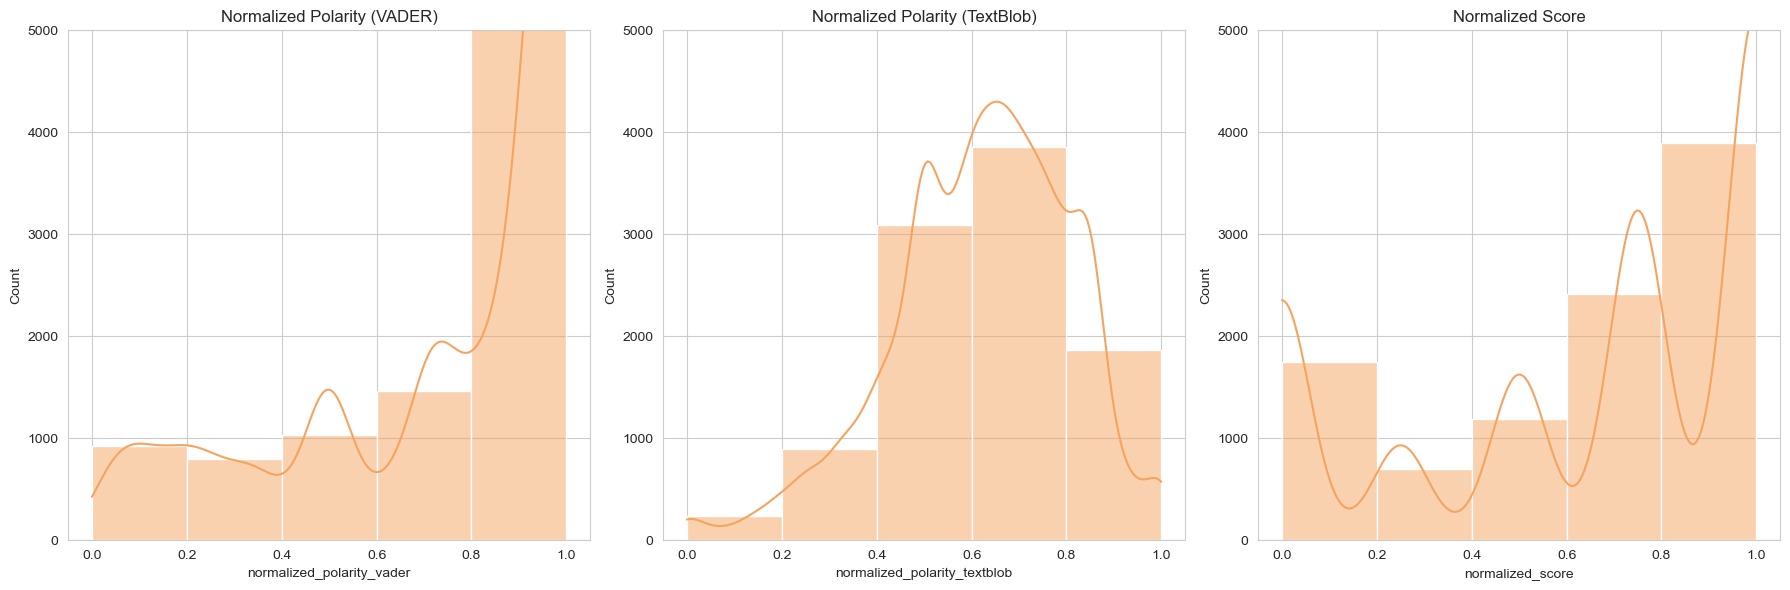

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for normalized_polarity_vader
sns.histplot(reviews_content["normalized_polarity_vader"], kde=True, bins=5, color='sandybrown', ax=axes[0])
axes[0].set_ylim(0, 5000)
axes[0].set_title("Normalized Polarity (VADER)")

# Plot for normalized_score
sns.histplot(reviews_content["normalized_score"], kde=True, bins=5, color='sandybrown', ax=axes[2])
axes[2].set_ylim(0, 5000)
axes[2].set_title("Normalized Score")

# Plot for normalized_polarity_textblob
sns.histplot(reviews_content["normalized_polarity_textblob"], kde=True, bins=5, color='sandybrown', ax=axes[1])
axes[1].set_ylim(0, 5000)
axes[1].set_title("Normalized Polarity (TextBlob)")

plt.tight_layout()
plt.show()


The histogram reveals that most VADER content polarity scores are concentrated in the positive range (0.5 to 1.0), with fewer negative scores, suggesting that the majority of the analyzed reviews carry positive sentiment.

TextBlob shows a more balanced distribution compared to VADER, with a significant concentration of scores around the neutral range (0 to 0.5). Positive sentiment dominates, but there is still a notable portion of slightly negative polarity scores. This indicates that reviews tend to reflect a mix of neutral and positive sentiments. Thus, we explored further.

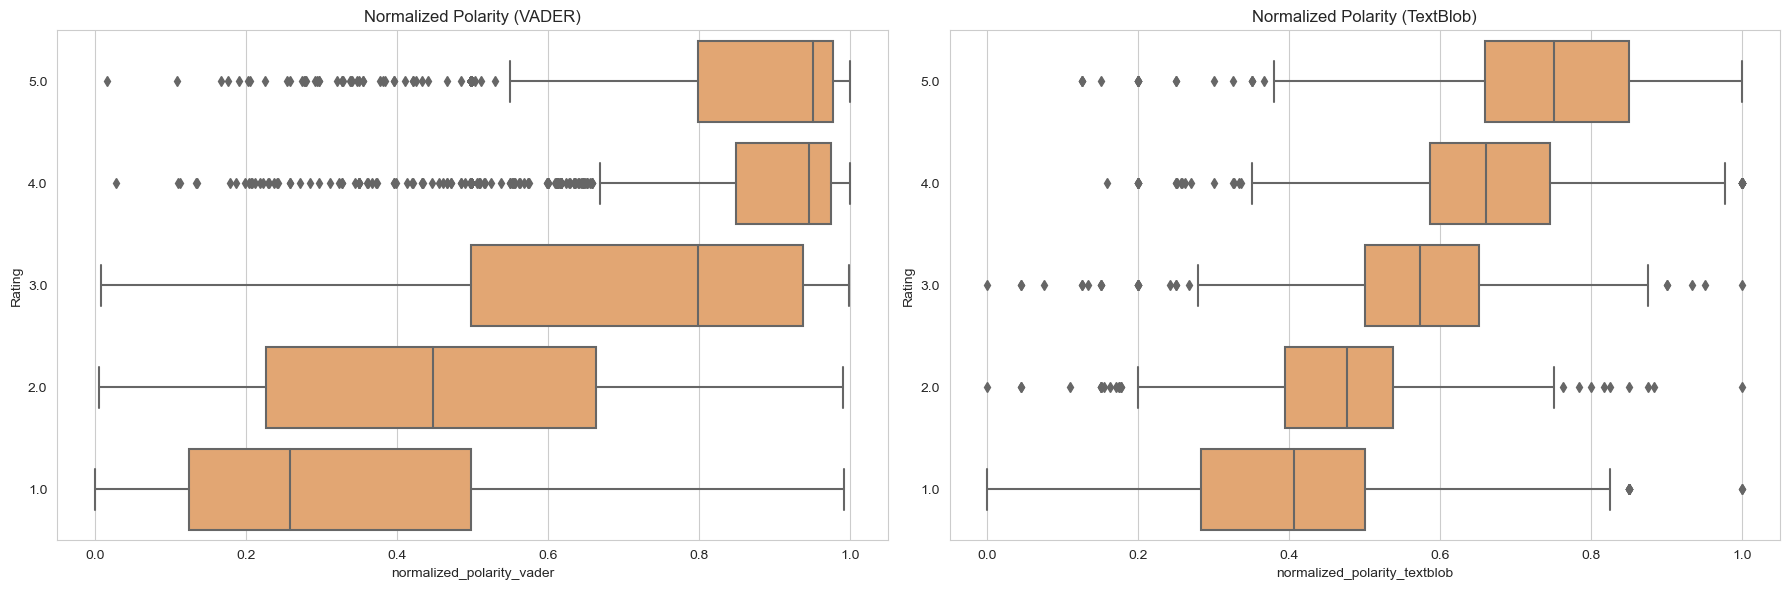

In [ ]:
reviews_content["Rating"] = reviews_content["Rating"].apply(lambda score : str(score))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for normalized_polarity_vader
sns.boxplot(data=reviews_content, x="normalized_polarity_vader", y="Rating", color='sandybrown', order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax=axes[0])
axes[0].set_title("Normalized Polarity (VADER)")

# Boxplot for normalized_polarity_textblob
sns.boxplot(data=reviews_content, x="normalized_polarity_textblob", y="Rating", color='sandybrown', order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax=axes[1])
axes[1].set_title("Normalized Polarity (TextBlob)")

plt.tight_layout()
plt.show()

We observed from the box plots above that VADER is able to capture a higher range of sentiment (lower kurtosis), which is beneficial for our task.

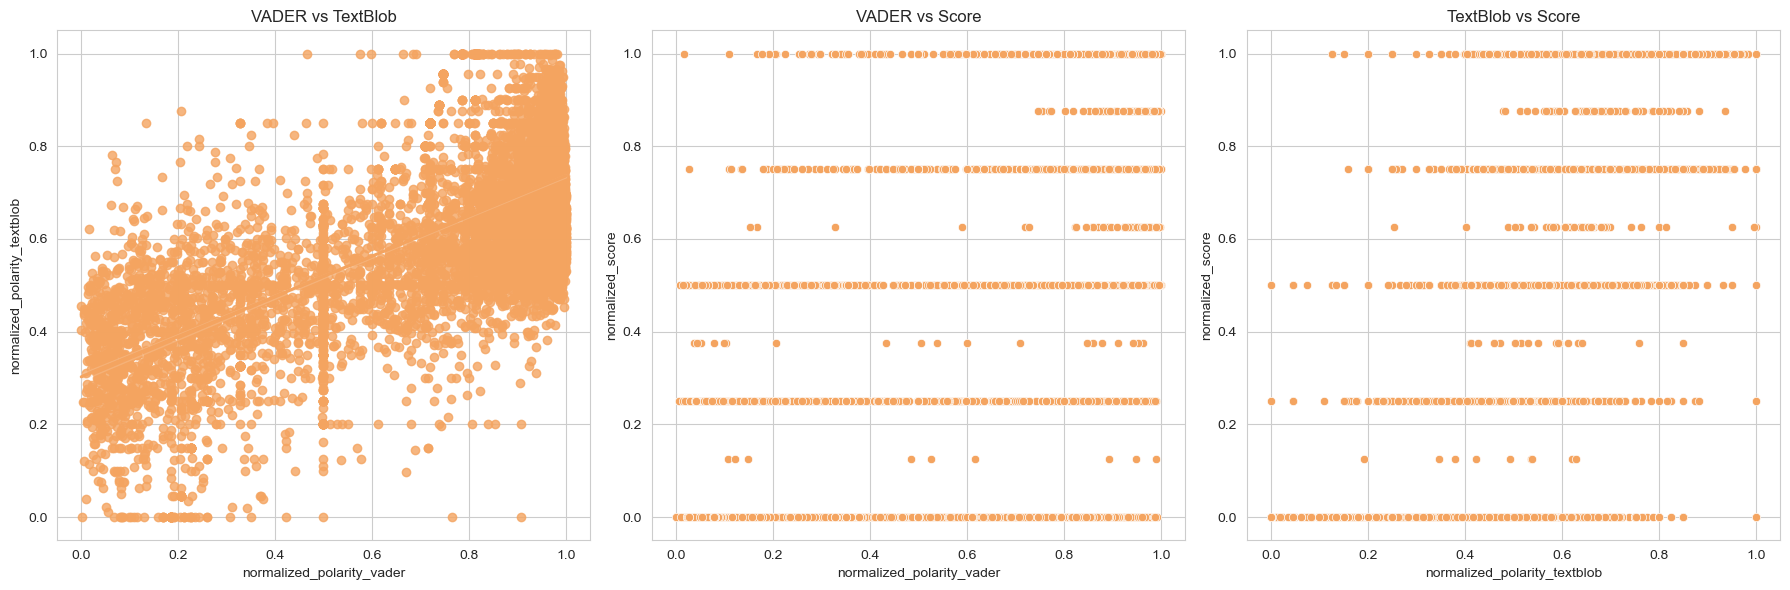

In [73]:
# Create a figure and axes to plot the three regression plots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Regression plot for normalized_polarity_vader vs normalized_polarity_textblob
sns.regplot(data=reviews_content, x="normalized_polarity_vader", y="normalized_polarity_textblob", color='sandybrown', ax=axes[0])
axes[0].set_title("VADER vs TextBlob")

# Regression plot for normalized_polarity_vader vs normalized_score
sns.scatterplot(data=reviews_content, x="normalized_polarity_vader", y="normalized_score", color='sandybrown', ax=axes[1])
axes[1].set_title("VADER vs Score")

# Regression plot for normalized_polarity_textblob vs normalized_score
sns.scatterplot(data=reviews_content, x="normalized_polarity_textblob", y="normalized_score", color='sandybrown', ax=axes[2])
axes[2].set_title("TextBlob vs Score")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The scatter plot comparing VADER and TextBlob polarity shows a weak correlation, with TextBlob generally producing lower polarity values for higher VADER scores, indicating differing sentiment interpretations.

The VADER and TextBlob comparisons with the normalized score suggest that both tools produce scores that align well with the normalized metric but display significant variability for individual data points.

So, after running some examples and by the plots shown above, we understood that TextBlob is indeed worst for informal text, corresponding to what we've seen in class. Therefore, we will continue with VADER for our analysis.

<font color='#BFD72F' size=4>1.4.5 WordClouds of Sentiment</font> <a class="anchor" id="P15"></a>

To better understand customer satisfaction, we generated wordclouds from all reviews. First, for single words (unigrams), and then for pairs of words (bigrams). With this, we aimmed to see if there was any pattern or recurring theme that could provide deeper insights into the emotions and priorities expressed in each sentiment category.

In [74]:
def sent_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    
    polarity = vader_wrapper(word)
    
    if polarity > 0.5:
        return (50,141,28)
    elif polarity < -0.5:
        return (255,0,0)
    else:
        return (0,0,0)

Wordclouds for unigrams:

In [75]:
#instance the vectoriser and the word cloud generator
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1, 2) ,max_features=50000)  # Limiting the number of unigrams 
wc_sent = WordCloud(background_color="white",max_words=100, width = 500,height = 500, color_func=sent_color_func)

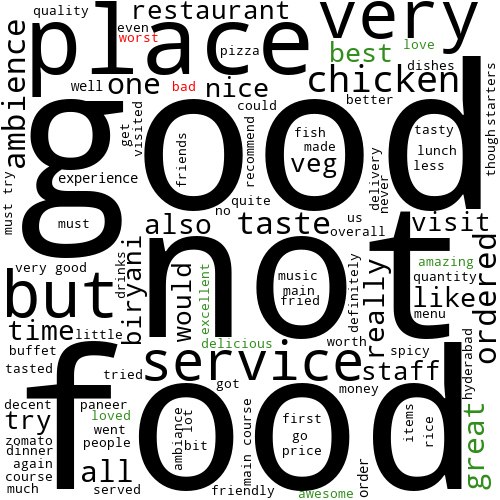

In [80]:
reviews_bow_td_matrix = unigram_bow_vectorizer.fit_transform(reviews_content["preproc_content"]).toarray()
reviews_content["initial_bow_vector"] = reviews_bow_td_matrix.tolist()
reviews_bow_word_list = unigram_bow_vectorizer.get_feature_names_out()

reviews_raw_vocabulary = word_freq_calculator(reviews_bow_td_matrix,reviews_bow_word_list, df_output=False)
wc_sent.generate_from_frequencies(reviews_raw_vocabulary)
wc_sent.to_image()

We decided to remove "good" and "food" from the word clouds because they were overly frequent and added little value in identifying specific insights or patterns.

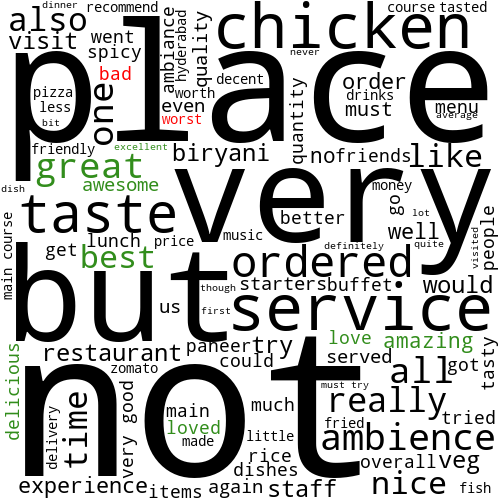

In [81]:
# Remove unwanted bigrams from the vocabulary
unwanted_unigrams = {'food', 'good'}  # Add bigrams you want to exclude here
filtered_vocabulary = {k: v for k, v in reviews_raw_vocabulary.items() if k not in unwanted_unigrams}

# Generate the WordCloud using the filtered vocabulary
wc_sent.generate_from_frequencies(filtered_vocabulary)
wc_sent.to_image()

Wordcloud for bigrams:

In [82]:
#instance the vectoriser and the word cloud generator
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50000)  # Limiting the number of bigrams
wc_sent = WordCloud(background_color="white",max_words=100, width = 500,height = 500, color_func=sent_color_func)

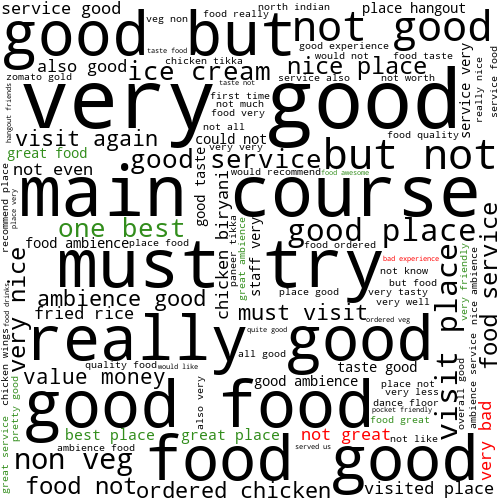

In [83]:
reviews_bow_td_matrix = bigram_bow_vectorizer.fit_transform(reviews_content["preproc_content"]).toarray()
reviews_content["initial_bow_vector"] = reviews_bow_td_matrix.tolist()
reviews_bow_word_list = bigram_bow_vectorizer.get_feature_names_out()

reviews_raw_vocabulary = word_freq_calculator(reviews_bow_td_matrix,reviews_bow_word_list, df_output=False)
wc_sent.generate_from_frequencies(reviews_raw_vocabulary)
wc_sent.to_image()

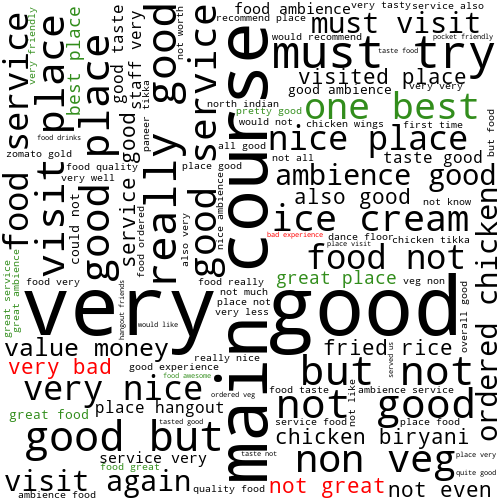

In [84]:
# Remove unwanted bigrams from the vocabulary
unwanted_bigrams = {'food good', 'good food', 'food', 'good'}  # Add bigrams you want to exclude here
filtered_vocabulary = {k: v for k, v in reviews_raw_vocabulary.items() if k not in unwanted_bigrams}

# Generate the WordCloud using the filtered vocabulary
wc_sent.generate_from_frequencies(filtered_vocabulary)
wc_sent.to_image()

It seems that positive feedback highlights bigrams like "good food," "great service," "nice place," and dishes like "chicken biryani" and "ice cream," showcasing customer satisfaction with taste and specific menu items. Customers also emphasize a pleasant atmosphere with phrases like "great ambience" and "amazing experience." However, occasional dissatisfaction surfaces with mentions of "bad experience" and "worst service." 
Overall, the reviews focus on recommending dishes, appreciating good service, and enjoying the overall dining environment.

Next, we generated Wordclouds specific for positive, neutral, and negative sentiments, to gain deeper insights into each feeling and to identify patterns in the most frequent words and themes that highlight customer satisfaction, concerns, and overall priorities.

In [44]:
def generate_multiple_wordclouds(data, column, sentiment_column, additional_stopwords=None):

    # Define sentiment categories
    sentiment_filters = {
        "Positive Sentiment": data[sentiment_column] > 0,
        "Negative Sentiment": data[sentiment_column] < 0,
        "Neutral Sentiment": data[sentiment_column] == 0,
        "Really Positive Sentiment": data[sentiment_column] > 0.5,
        "Really Negative Sentiment": data[sentiment_column] < -0.5
    }

    # Add custom stopwords
    custom_stopwords = set(additional_stopwords) if additional_stopwords else set()

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
    axes = axes.flatten()  # Flatten axes array for easier iteration
    
    # Generate word clouds for each sentiment category
    for i, (title, condition) in enumerate(sentiment_filters.items()):
        sentiment_data = data[condition][column].str.cat(sep=' ')
        
        if sentiment_data:  # Ensure there's text to generate the word cloud
            wordcloud = WordCloud(
                width=800, 
                height=800,
                background_color='white',
                stopwords=custom_stopwords,  # Exclude specified words
                min_font_size=10
            ).generate(sentiment_data)
            
            # Plot the word cloud
            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].axis("off")
            axes[i].set_title(title, fontsize=14)
        else:
            # If no data for the condition, display a message
            axes[i].axis("off")
            axes[i].set_title(f"No Data for {title}", fontsize=14)
    
    # Remove any unused subplot (if fewer than 6 plots)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

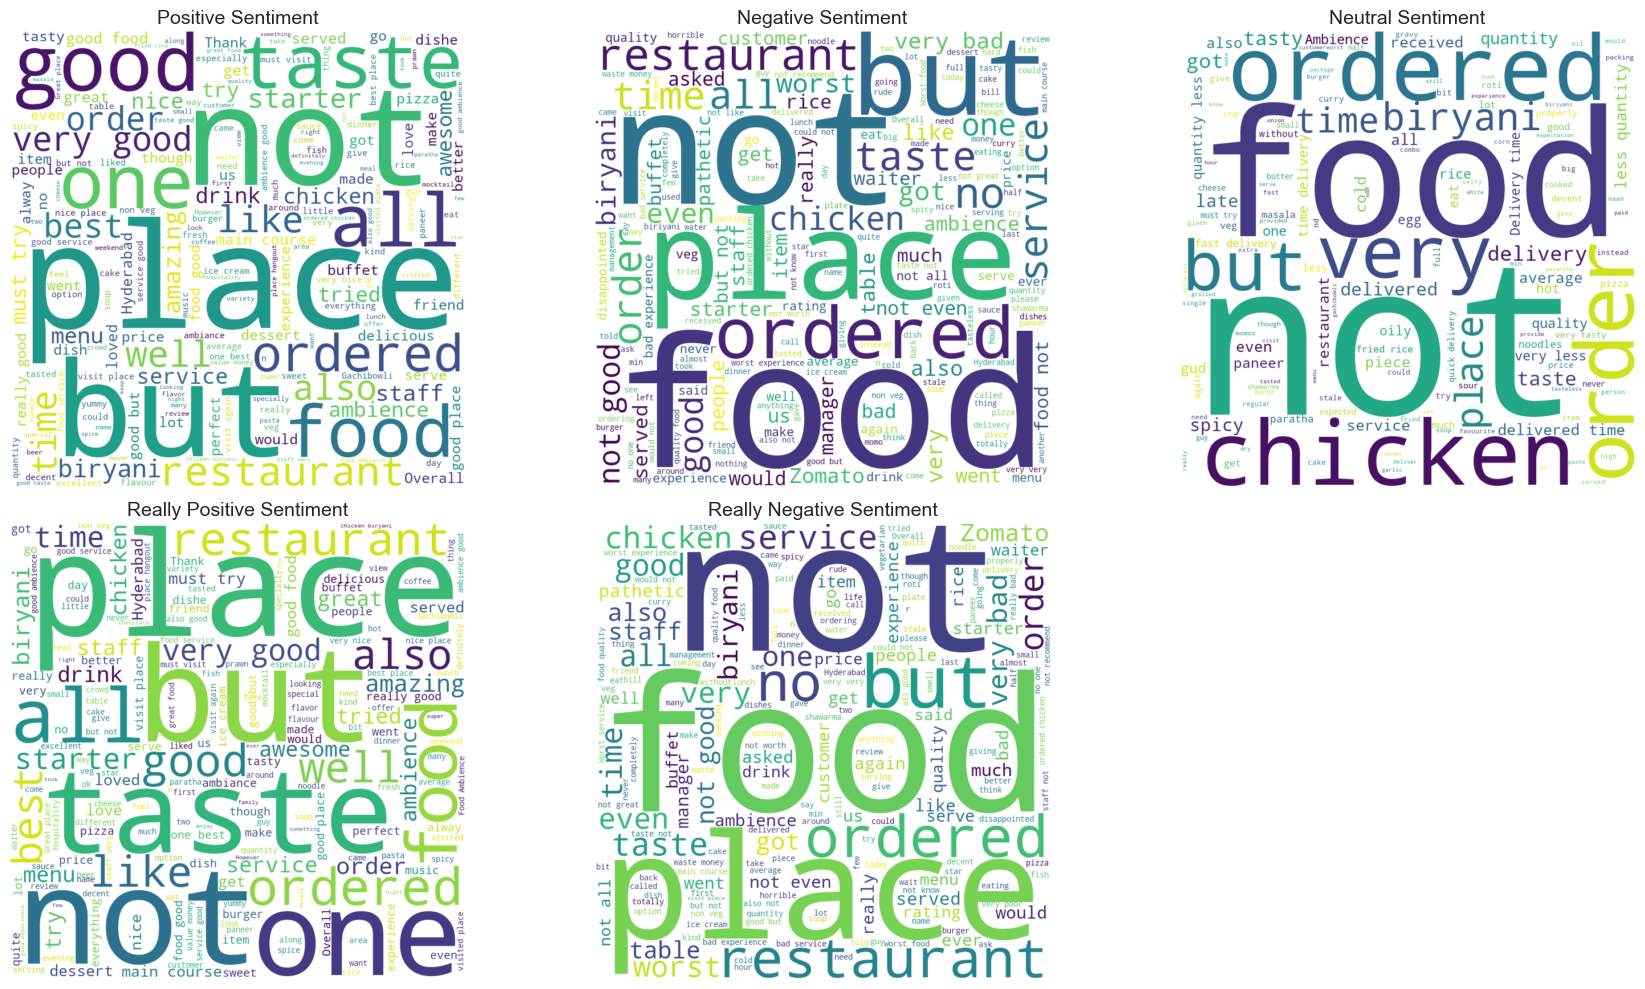

In [45]:
generate_multiple_wordclouds(reviews_content, 'preproc_content', 'content_polarity_vader', None)

As we saw in the previous word clouds, "food" and "good" had a significant presence across all sentiment categories. To gain further insights and better visualize other important words, we decided to exclude these terms. We implemented a function that removes them, allowing us to compare the results more effectively.

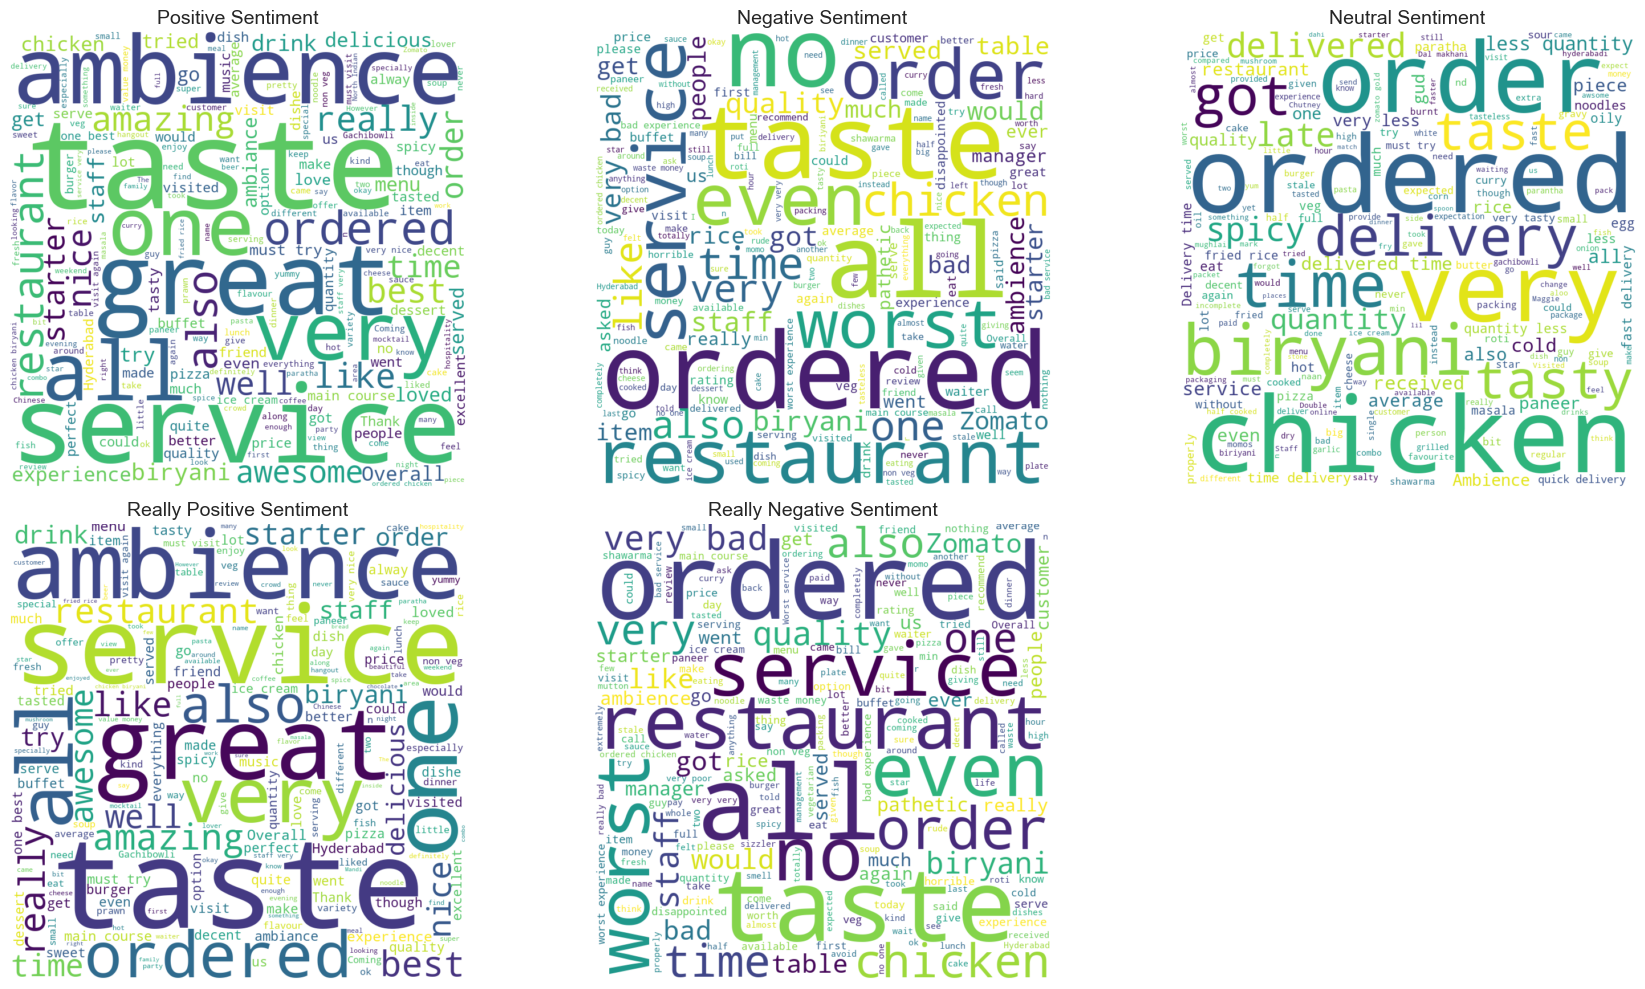

In [46]:
additional_stopwords = ['food', 'good', 'place', 'not', 'but']
generate_multiple_wordclouds(reviews_content, 'preproc_content', 'content_polarity_vader', additional_stopwords)

We can conclude that:
- Positive and Really Positive Sentiments prominently feature words like "great," "taste," "service," and "ambience," indicating that customers appreciate the food's flavor, quality, and atmosphere. Words like "nice" and "amazing" further emphasize satisfaction.

- Negative and Really Negative Sentiments highlight issues such as "bad," "worst," "quality," and "taste," suggesting dissatisfaction with food quality or overall experience. Frequent mentions of "ordered," "even," and "service" point to complaints about orders or staff interactions.

- Neutral Sentiment reflects more factual observations with words like "ordered," "delivered," "chicken," and "quantity." This indicates a focus on describing experiences without strong opinions.

Overall, customer reviews emphasize food taste, service quality, and order-related issues across all sentiments, with positive reviews being heavily driven by good ambience and taste, while negative reviews focus on poor taste and service.

<font color='#BFD72F' size=4>1.4.6 Rating VS Polarity</font> <a class="anchor" id="P15"></a>

We plotted this to lastly ensure whether polarity can reliably predict ratings by examining the distribution of sentiment across different score categories and identifying any patterns or inconsistencies.

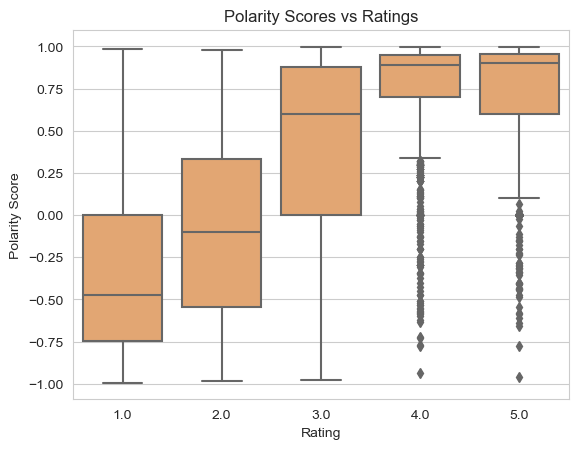

In [79]:
sns.boxplot(x='Rating', y='content_polarity_vader', data=reviews_content, color='sandybrown', order=["1.0", "2.0", "3.0", "4.0", "5.0"])
plt.title('Polarity Scores vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Polarity Score')
plt.show()

The box plot reveals that polarity can predict the rating with some degree of accuracy, as it displays a noticeable linear trend: low scores correspond to lower polarity, while high scores are associated with higher polarity. Additionally, the plot highlights the presence of some exceptions, indicating that the relationship is not entirely perfect.

<font color='#BFD72F' size=5>1.5 Further Analysis</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

This section aims to conduct a more in-depth analysis of the data to uncover patterns and identify potential relationships.

In [85]:
restaurants = pd.read_pickle('data/restaurants_initial_preproc.pkl')
restaurants.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                         Collections  \
0  [Food Hygiene Rated Restaurants in Hyderabad, ...   
1                              [Hyderabad's Hottest]   
2               [Great Buffets, Hyderabad's Hottest]   
3                           [Late Night Restaurants]   
4  [Best Bars & Pubs, Food Hygiene Rated Restaura...   

                                            Cuisines  N_collections open time  \
0  [Chinese, Continental, Kebab, European, South ...              6        12   
1                   [Biryani, North Indian, Chinese]              1        11   
2     [Asian, Mediterranean, North Indian, Desserts]              2        11   
3  [Biryani, North Indian, Chinese, Seafood, Beve...              1        12   
4  [Asian, Continental, North Indian, Chinese, Me...              5        12   

  closing time  
0           23  
1           23  
2           23  
3            2  
4           24

<font color='#BFD72F' size=4>1.5.1 By Cost</font> <a class="anchor" id="P15"></a>

We considered it worth to investigate whether the cost of a restaurant influences the polarity of reviews and the ratings, seeking to identify any potential correlations between these factors, by exploring the most expensive and cheapest restaurants.

**Most Expensive Restaurant:** We decided to explore the most expensive restaurant to satisfy our curiosity about pricing trends and how they relate to other factors, such as ratings and sentiment.

In [86]:
print(restaurants['Cost'].max())
restaurants[restaurants['Cost'] == 2800]

2800


Name  Cost        Collections  \
92  Collage - Hyatt Hyderabad Gachibowli  2800  [Sunday Brunches]   

                                             Cuisines  N_collections  \
92  [Continental, Italian, North Indian, Chinese, ...              1   

   open time closing time  
92        24           24

In [87]:
most_expensive = reviews[reviews['Restaurant'] == 'Collage - Hyatt Hyderabad Gachibowli']
most_expensive.head()

Restaurant           Reviewer  \
9200  Collage - Hyatt Hyderabad Gachibowli  Pavan Hitesh PVNG   
9201  Collage - Hyatt Hyderabad Gachibowli                 SM   
9202  Collage - Hyatt Hyderabad Gachibowli         Vins Thapa   
9203  Collage - Hyatt Hyderabad Gachibowli    Amardeep Dabass   
9204  Collage - Hyatt Hyderabad Gachibowli        Alakesh Deb   

                                                 Review  Rating  \
9200  Good ambiance with wide range food options , p...     3.0   
9201  We were there to celebrate our anniversary. Th...     3.0   
9202  Mr. Faraan, Mr. Llima, Mrs, Piyali, is awexome...     5.0   
9203  Had a great experience at this place. Went for...     5.0   
9204  I was excited about the team lunch at Hyatt, h...     1.0   

                    Time  Pictures  N_reviews  Followers  Month  Year  \
9200 2019-05-08 23:38:00         0          1          1      5  2019   
9201 2019-05-06 11:02:00         0         66        192      5  2019   
9202 2019-04-28 16:03:00         0          2       <NA>      4  2019   
9203 2019-04-22 23:05:00         2         26        193      4  2019   
9204 2019-04-22 10:59:00         0          2         25      4  2019   

      Weekend  Post_Meal  rev_len  nr_sents  
9200        0          1      143         1  
9201        0          0      520         4  
9202        1          0      216         3  
9203        0          1      163         3  
9204        0          0      625        12

In [88]:
most_expensive['Rating'].mean()

3.41

An average rating of 3.41 for this restaurant suggests a mixed customer experience—while not extremely low, it indicates room for improvement. This could reflect a range of opinions, with some customers possibly enjoying the experience but others dissatisfied, especially given the high price. So, we thought it would be interesting to explore what aspects are driving the rating and how they align with the restaurant’s pricing.

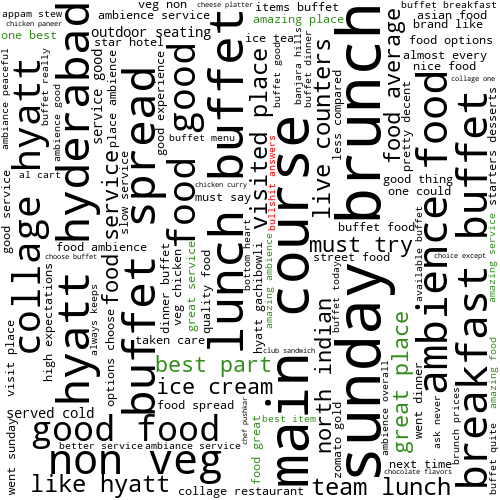

In [90]:
#instance the vectoriser and the word cloud generator
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50000)  # Limiting the number of bigrams
#bigram_bow_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern=r"(?u)\b\w+\b")  
wc_sent = WordCloud(background_color="white",max_words=100, width = 500,height = 500, color_func=sent_color_func)

most_expensive["preproc_content_no_stopwords"] = most_expensive["Review"].map(lambda review : main_pipeline(review,
                                                                                                          no_emojis = False,
                                                                                                          no_stopwords=True,
                                                                                                          lowercase=True,
                                                                                                          lemmatized=False,
                                                                                                          no_punctuation=False,
                                                                                                          convert_diacritics = False))

most_expensive_bow_td_matrix = bigram_bow_vectorizer.fit_transform(most_expensive["preproc_content_no_stopwords"]).toarray()
most_expensive["initial_bow_vector"] = most_expensive_bow_td_matrix.tolist()
most_expensive_bow_word_list = bigram_bow_vectorizer.get_feature_names_out()

most_expensive_raw_vocabulary = word_freq_calculator(most_expensive_bow_td_matrix, most_expensive_bow_word_list, df_output=False)
wc_sent.generate_from_frequencies(most_expensive_raw_vocabulary)
wc_sent.to_image()

It appears that most clients highlight the Sunday brunch, praising the ambiance, the place, and the food. However, there are complaints about the response times and slow service. Interestingly, the price is not frequently mentioned.

**Cheapest Restaurant**

In [91]:
print(restaurants['Cost'].min())
restaurants[restaurants['Cost'] == 150]

150


Name  Cost Collections                Cuisines  \
23                 Amul   150         NaN   [Ice Cream, Desserts]   
89  Mohammedia Shawarma   150         NaN  [Street Food, Arabian]   

    N_collections open time closing time  
23              0        10            5  
89              0        13            1

In [92]:
cheapest_1 = reviews[reviews['Restaurant'] == 'Amul']
cheapest_2 = reviews[reviews['Restaurant'] == 'Mohammedia Shawarma']
cheapest_1.head()

Restaurant          Reviewer  \
2300       Amul        Amar Stark   
2301       Amul    Anupam Acharya   
2302       Amul      Suresh Kumar   
2303       Amul      Aditi Bhaiji   
2304       Amul  Buddiga Sindhuri   

                                                 Review  Rating  \
2300  The place I prefer most for good taste and enj...     5.0   
2301  We had ordered from Amul and we will order aga...     4.0   
2302  Thank-you for serving testy milkshakes in late...     5.0   
2303  Although I didn't go to the onsite store, but ...     4.0   
2304  This is a small ice cream parlour.It has all g...     4.0   

                    Time  Pictures  N_reviews  Followers  Month  Year  \
2300 2019-05-19 14:01:00         0          2          1      5  2019   
2301 2019-05-17 12:29:00         0        207        400      5  2019   
2302 2019-05-17 01:32:00         0          1       <NA>      5  2019   
2303 2019-04-30 14:10:00         2          6       <NA>      4  2019   
2304 2019-04-19 19:02:00         2         60       2007      4  2019   

      Weekend  Post_Meal  rev_len  nr_sents  
2300        1          1      148         1  
2301        0          0      380         5  
2302        0          0      142         1  
2303        0          1      469         8  
2304        0          0      465         2

In [93]:
cheapest_1['Rating'].mean()

3.9292929292929295

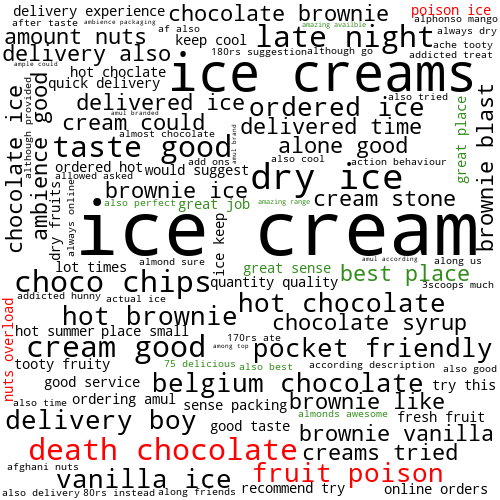

In [94]:
#instance the vectoriser and the word cloud generator
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50000)  # Limiting the number of bigrams
#bigram_bow_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern=r"(?u)\b\w+\b")  
wc_sent = WordCloud(background_color="white",max_words=100, width = 500,height = 500, color_func=sent_color_func)

cheapest_1["preproc_content_no_stopwords"] = cheapest_1["Review"].map(lambda review : main_pipeline(review,
                                                                                                    no_emojis = False,
                                                                                                    no_stopwords=True,
                                                                                                    lowercase=True,
                                                                                                    lemmatized=False,
                                                                                                    no_punctuation=False,
                                                                                                    convert_diacritics = False))

cheapest_1_bow_td_matrix = bigram_bow_vectorizer.fit_transform(cheapest_1["preproc_content_no_stopwords"]).toarray()
cheapest_1["initial_bow_vector"] = cheapest_1_bow_td_matrix.tolist()
cheapest_1_bow_word_list = bigram_bow_vectorizer.get_feature_names_out()

cheapest_1_raw_vocabulary = word_freq_calculator(cheapest_1_bow_td_matrix, cheapest_1_bow_word_list, df_output=False)
wc_sent.generate_from_frequencies(cheapest_1_raw_vocabulary)
wc_sent.to_image()

In [95]:
cheapest_2.head()

Restaurant             Reviewer  \
8900  Mohammedia Shawarma    Sarath.17.04.1993   
8901  Mohammedia Shawarma        Jayakar Reddy   
8902  Mohammedia Shawarma            ARUN NANI   
8903  Mohammedia Shawarma  Mohammad Gulamqadar   
8904  Mohammedia Shawarma        Shaikh Shamim   

                                                 Review  Rating  \
8900  Best shawarma served at reasonable price and t...     4.0   
8901  WASTE RESTAURANT...\r\nI ordered special chick...     1.0   
8902  Till now this is the worst shawarma what I tas...     1.0   
8903  Worst shawarma i have ever tasted\r\n\r\nI bel...     1.0   
8904  (Strong recommendation- never ever order from ...     1.0   

                    Time  Pictures  N_reviews  Followers  Month  Year  \
8900 2019-05-24 22:09:00         0          1          1      5  2019   
8901 2019-05-21 02:25:00         0          1       <NA>      5  2019   
8902 2019-04-29 01:12:00         0          1          1      4  2019   
8903 2019-04-22 21:02:00         0          3          1      4  2019   
8904 2019-04-19 02:05:00         0          1          1      4  2019   

      Weekend  Post_Meal  rev_len  nr_sents  
8900        0          1      141         2  
8901        0          0      185         2  
8902        0          0      167         1  
8903        0          1      202         1  
8904        0          0      245         3

In [96]:
cheapest_2['Rating'].mean()

2.99

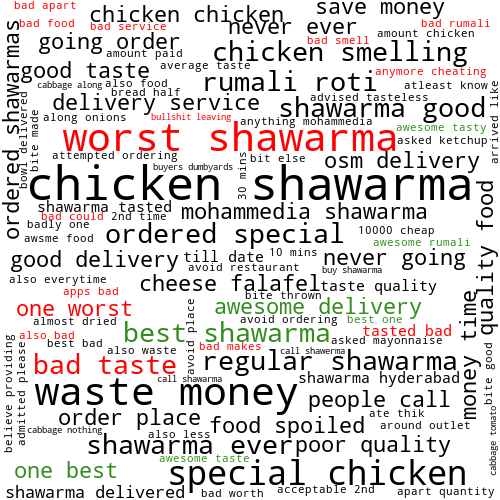

In [97]:
#instance the vectoriser and the word cloud generator
bigram_bow_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50000)  # Limiting the number of bigrams
#bigram_bow_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern=r"(?u)\b\w+\b")  
wc_sent = WordCloud(background_color="white",max_words=100, width = 500,height = 500, color_func=sent_color_func)

cheapest_2["preproc_content_no_stopwords"] = cheapest_2["Review"].map(lambda review : main_pipeline(review,
                                                                                                    no_emojis = False,
                                                                                                    no_stopwords=True,
                                                                                                    lowercase=True,
                                                                                                    lemmatized=False,
                                                                                                    no_punctuation=False,
                                                                                                    convert_diacritics = False))

cheapest_2_bow_td_matrix = bigram_bow_vectorizer.fit_transform(cheapest_2["preproc_content_no_stopwords"]).toarray()
cheapest_2["initial_bow_vector"] = cheapest_2_bow_td_matrix.tolist()
cheapest_2_bow_word_list = bigram_bow_vectorizer.get_feature_names_out()

cheapest_2_raw_vocabulary = word_freq_calculator(cheapest_2_bow_td_matrix, cheapest_2_bow_word_list, df_output=False)
wc_sent.generate_from_frequencies(cheapest_2_raw_vocabulary)
wc_sent.to_image()

Customers tend to have more complaints about the cheapest restaurants compared to the more expensive ones. Therefore, we can conclude that price, as expected, has a certain influence on the overall quality of the restaurants, which in turn affects the polarity of the reviews and ratings.

<font color='#BFD72F' size=4>1.5.2 By Cuisine Type</font> <a class="anchor" id="P15"></a>

Here, we explored whether the type of cuisine impacts both the polarity of reviews and the polarity, analyzing these factors to identify any meaningful relationships.

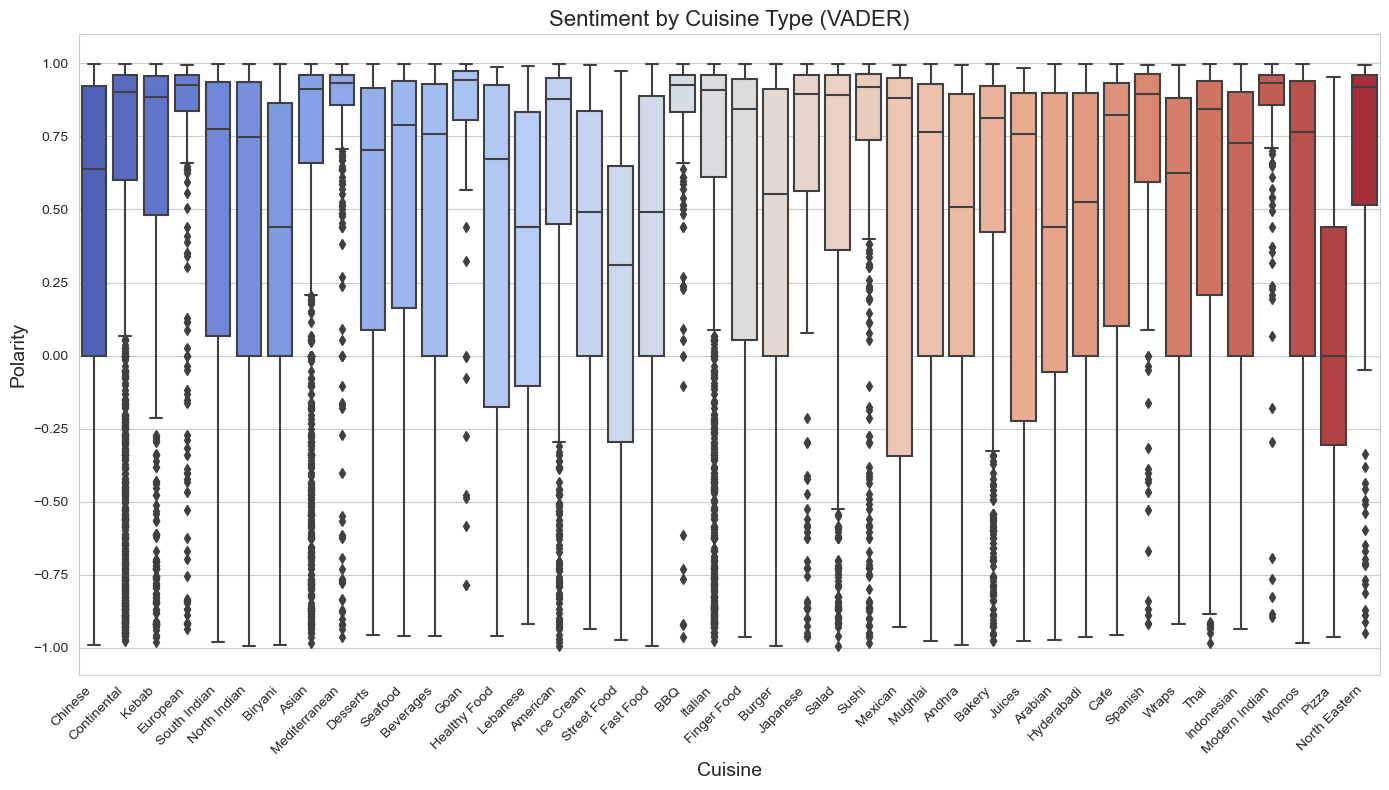

In [98]:
merged_data = pd.merge(reviews_content, restaurants, left_on='Restaurant', right_on='Name', how='left')
merged_data_exploded = merged_data.explode('Cuisines').reset_index(drop=True)

sentiment_by_cuisine = merged_data_exploded.groupby('Cuisines')['content_polarity_vader'].mean().reset_index()

plt.figure(figsize=(14, 8)) 
sns.boxplot(data=merged_data_exploded, x='Cuisines', y='content_polarity_vader', palette="coolwarm")

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.title('Sentiment by Cuisine Type (VADER)', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Polarity', fontsize=14)

plt.tight_layout()
plt.show()


The boxplot reveals clear variations in sentiment scores across different cuisine types, offering valuable insights into customer perceptions. Cuisines like Pizza, Modern Indian, and Wraps stand out with the highest overall sentiment, as their median scores are close to 1 and display narrow spreads. This consistency indicates strong positive reception and minimal dissatisfaction among reviewers. On the other hand, cuisines such as Fast Food, Street Food, and Japanese exhibit a wider range of sentiment scores, suggesting a more polarized experience—while some customers are highly satisfied, others express negative sentiments, possibly due to inconsistencies in quality or expectations.

Interestingly, cuisines like Chinese, Kebab, and Sushi show a mix of neutral and slightly positive scores, with noticeable outliers extending into the negative range, indicating sporadic dissatisfaction. In contrast, cuisines like Bakery, Cafe, and Arabian maintain moderate positivity with relatively consistent sentiment, positioning them as reliable choices for customers. Overall, while certain cuisines enjoy widespread favorability and fewer negative reviews, others face mixed reception, highlighting both their appeal and areas for improvement. This analysis provides actionable insights into how cuisines are perceived, which can help restaurants focus on improving their offerings to enhance customer satisfaction.

Let's explore further.

In [100]:
analyzer = SentimentIntensityAnalyzer()

# Function to calculate VADER scores
def vader_sentiment_scores(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)
    else:
        return {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

# Apply VADER sentiment scoring to all reviews
vader_scores = merged_data_exploded['Review'].apply(vader_sentiment_scores)

# Create individual columns for sentiment components
merged_data_exploded['compound_score_vader'] = vader_scores.apply(lambda x: x['compound'])
merged_data_exploded['negative_score_vader'] = vader_scores.apply(lambda x: x['neg'])
merged_data_exploded['neutral_score_vader'] = vader_scores.apply(lambda x: x['neu'])
merged_data_exploded['positive_score_vader'] = vader_scores.apply(lambda x: x['pos'])

# Group by Cuisine and Aggregate VADER Sentiment Scores
merged_scores_vader_cuisine = (merged_data_exploded.groupby('Cuisines')
                               .agg({'compound_score_vader': 'mean',
                                     'negative_score_vader': 'mean',
                                     'neutral_score_vader': 'mean',
                                     'positive_score_vader': 'mean'})
                               .rename(columns={'compound_score_vader': 'compound_score',
                                                'negative_score_vader': 'negative_score',
                                                'neutral_score_vader': 'neutral_score',
                                                'positive_score_vader': 'positive_score'}))


merged_scores_vader_cuisine.sort_values(by='compound_score', ascending=False).head(10)

compound_score  negative_score  neutral_score  positive_score
Cuisines                                                                    
Modern Indian        0.816222        0.017980       0.679625        0.302410
Mediterranean        0.799522        0.016830       0.666632        0.316538
BBQ                  0.791786        0.016470       0.698755        0.284775
Goan                 0.770631        0.028890       0.716650        0.254490
European             0.749079        0.021488       0.678100        0.300405
Sushi                0.676505        0.043345       0.716372        0.240300
Asian                0.653510        0.038161       0.709534        0.252308
Continental          0.633108        0.040032       0.714991        0.244979
Italian              0.629331        0.041674       0.720764        0.237571
Spanish              0.619655        0.042770       0.740430        0.216810

In [101]:
# Cuisine type with the highest compound sentiment score
top_compound_cuisine = merged_scores_vader_cuisine['compound_score'].idxmax()
top_compound_value = merged_scores_vader_cuisine['compound_score'].max()

# Cuisine type with the highest positive sentiment score
top_positive_cuisine = merged_scores_vader_cuisine['positive_score'].idxmax()
top_positive_value = merged_scores_vader_cuisine['positive_score'].max()

# Cuisine type with the highest positive sentiment score
top_neutral_cuisine = merged_scores_vader_cuisine['neutral_score'].idxmax()
top_neutral_value = merged_scores_vader_cuisine['neutral_score'].max()

# Cuisine type with the most negative sentiment score
most_negative_cuisine = merged_scores_vader_cuisine['negative_score'].idxmax()
most_negative_value = merged_scores_vader_cuisine['negative_score'].max()

# Display results
print("Top Cuisine Types by Average Sentiment Scores:")
print(f"- Cuisine with the highest compound sentiment: {top_compound_cuisine} (Score: {top_compound_value:.3f})")
print(f"- Cuisine with the highest positive sentiment: {top_positive_cuisine} (Score: {top_positive_value:.3f})")
print(f"- Cuisine with the highest neutral sentiment: {top_neutral_cuisine} (Score: {top_neutral_value:.3f})")
print(f"- Cuisine with the most negative sentiment: {most_negative_cuisine} (Score: {most_negative_value:.3f})")

Top Cuisine Types by Average Sentiment Scores:
- Cuisine with the highest compound sentiment: Modern Indian (Score: 0.816)
- Cuisine with the highest positive sentiment: Mediterranean (Score: 0.317)
- Cuisine with the highest neutral sentiment: Healthy Food (Score: 0.776)
- Cuisine with the most negative sentiment: Street Food (Score: 0.098)


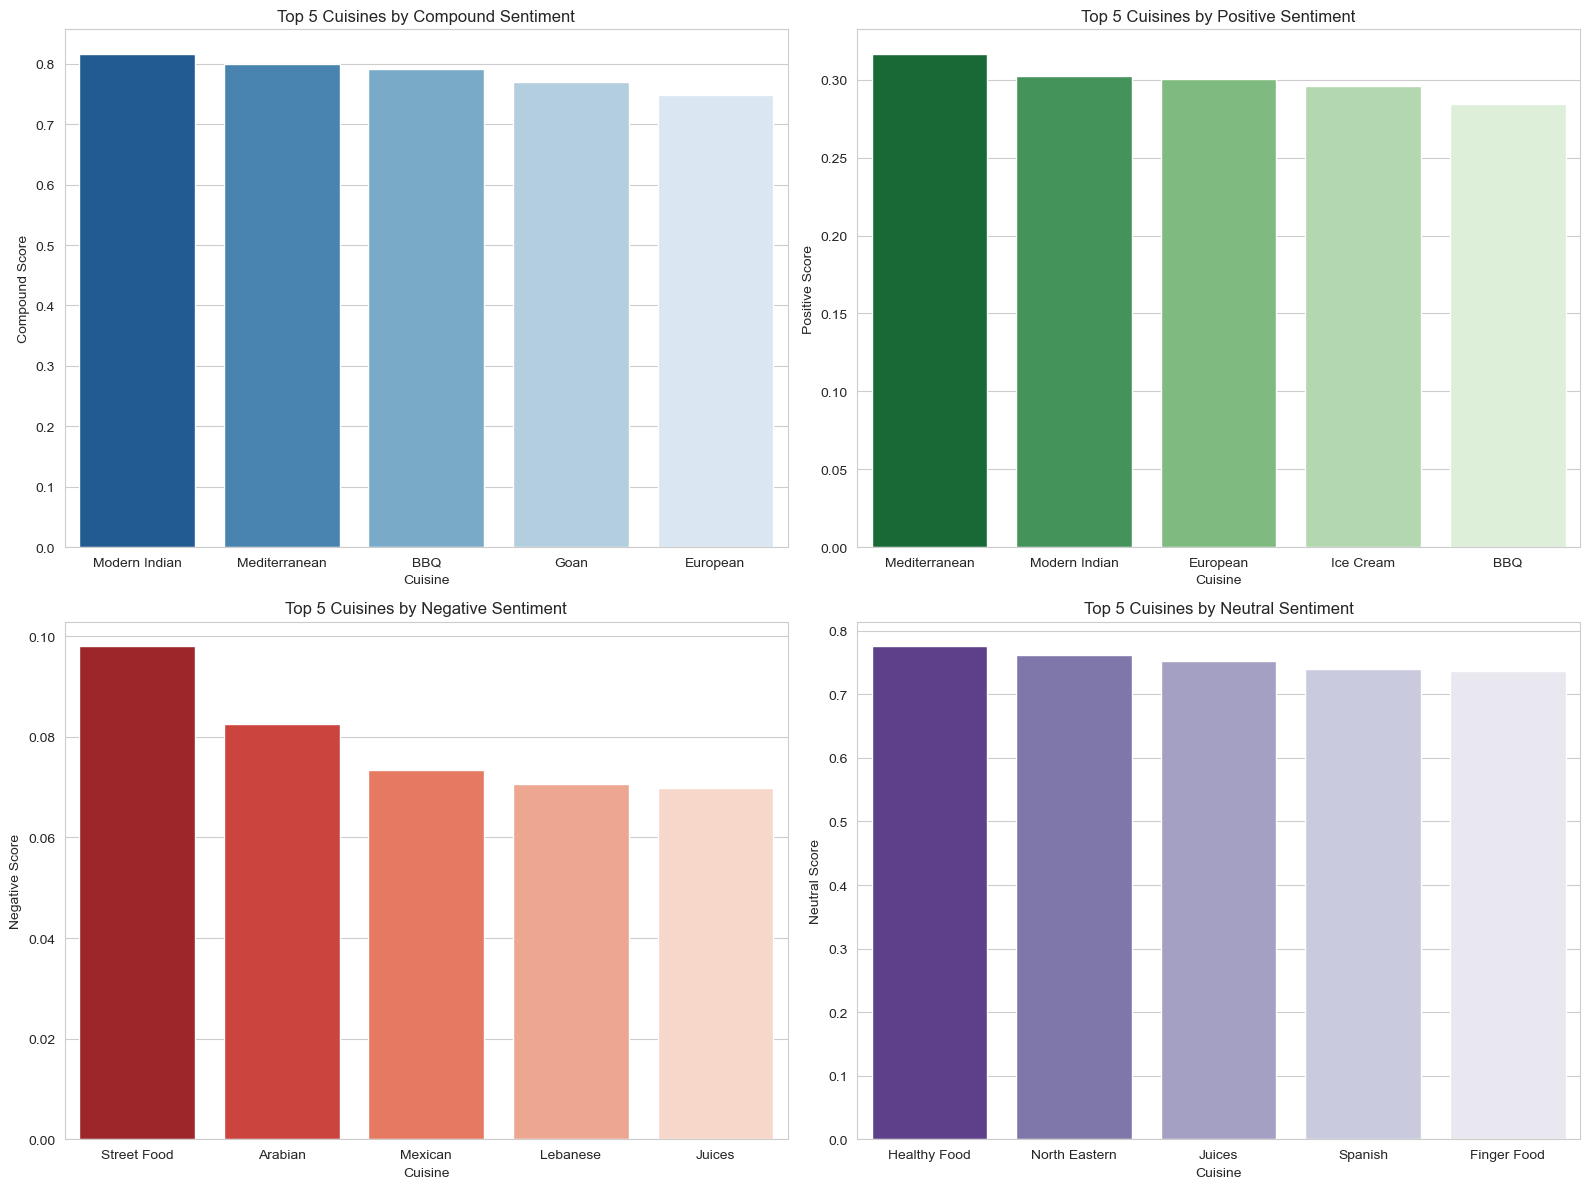

In [102]:
# Top 5 cuisines for each sentiment score
top_compound = merged_scores_vader_cuisine.nlargest(5, 'compound_score')
top_positive = merged_scores_vader_cuisine.nlargest(5, 'positive_score')
top_negative = merged_scores_vader_cuisine.nlargest(5, 'negative_score')
top_neutral = merged_scores_vader_cuisine.nlargest(5, 'neutral_score')

# Plot Top 5 Cuisines for Each Sentiment Component
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Compound Scores
sns.barplot(data=top_compound.reset_index(), x='Cuisines', y='compound_score', ax=axes[0, 0], palette='Blues_r')
axes[0, 0].set_title('Top 5 Cuisines by Compound Sentiment')
axes[0, 0].set_ylabel('Compound Score')
axes[0, 0].set_xlabel('Cuisine')

# Positive Scores
sns.barplot(data=top_positive.reset_index(), x='Cuisines', y='positive_score', ax=axes[0, 1], palette='Greens_r')
axes[0, 1].set_title('Top 5 Cuisines by Positive Sentiment')
axes[0, 1].set_ylabel('Positive Score')
axes[0, 1].set_xlabel('Cuisine')

# Negative Scores
sns.barplot(data=top_negative.reset_index(), x='Cuisines', y='negative_score', ax=axes[1, 0], palette='Reds_r')
axes[1, 0].set_title('Top 5 Cuisines by Negative Sentiment')
axes[1, 0].set_ylabel('Negative Score')
axes[1, 0].set_xlabel('Cuisine')

# Neutral Scores
sns.barplot(data=top_neutral.reset_index(), x='Cuisines', y='neutral_score', ax=axes[1, 1], palette='Purples_r')
axes[1, 1].set_title('Top 5 Cuisines by Neutral Sentiment')
axes[1, 1].set_ylabel('Neutral Score')
axes[1, 1].set_xlabel('Cuisine')

plt.tight_layout()
plt.show()

Modern Indian and Mediterranean cuisines stand out for positive sentiment, while Street Food faces higher negativity, and Healthy Food dominates neutral feedback, revealing contrasting customer perceptions.

<font color='#BFD72F' size=4>1.5.3 By Average Rating</font> <a class="anchor" id="P15"></a>

Additionally, we examined whether the average rating of a restaurant has any relationship with the polarity of reviews, considering the top 10 best and worst restaurants.

**Top 10 Best Restaurants Analysis** 

In [107]:
reviews_scaled = reviews_content.copy()

scaler = MinMaxScaler(feature_range=(-1, 1))
reviews_scaled['Scaled_Rating'] = scaler.fit_transform(reviews_scaled[['Rating']])

# Group by 'Restaurant' and calculate the mean of scaled ratings
scaled_top_restaurants = reviews_scaled.groupby('Restaurant')['Scaled_Rating'].mean().reset_index(name='avg_scaled_rating')

# Sort the results by the average scaled rating in descending order
top_10_scaled_restaurants = scaled_top_restaurants.sort_values(by='avg_scaled_rating', ascending=False).head(10)

top_10_scaled_restaurants

Restaurant  avg_scaled_rating
3                 AB's - Absolute Barbecues              0.940
11                                   B-Dubs              0.905
2            3B's - Buddies, Bar & Barbecue              0.880
67                                 Paradise              0.850
35                                 Flechazo              0.830
87                           The Indi Grill              0.800
97          Zega - Sheraton Hyderabad Hotel              0.725
64               Over The Moon Brew Company              0.670
16                          Beyond Flavours              0.640
19  Cascade - Radisson Hyderabad Hitec City              0.630

In [109]:
# Filter reviews for the top 10 restaurants
top_10_restaurant_names = top_10_restaurants['Restaurant'].tolist()
top_10_restaurant_reviews = reviews_content[reviews_content['Restaurant'].isin(top_10_restaurant_names)]
top_10_restaurant_reviews.sample(5)

Review  Rating  \
6962  Food was really good. Thankyou Raza subendhu a...     5.0   
2702  Gobind is nice friendly and well coporated in ...     5.0   
9789  Nice place.. it's in 10th floor.. love it!! Ha...     4.0   
90    Lovely ambience..Roasted chicken soup was the ...     4.0   
1467  Excellent food and ambiance one should definit...     5.0   

                           Restaurant  Weekend  Post_Meal  \
6962                   The Indi Grill        0          1   
2702   3B's - Buddies, Bar & Barbecue        0          1   
9789  Zega - Sheraton Hyderabad Hotel        0          1   
90                    Beyond Flavours        0          0   
1467        AB's - Absolute Barbecues        1          1   

                                        preproc_content  \
6962  Food really good . Thankyou Raza subendhu Ashr...   
2702  Gobind nice friendly well coporated serving co...   
9789  Nice place .. 10th floor .. love!! very less o...   
90    Lovely ambience .. Roasted chicken soup Highli...   
1467  Excellent food ambiance one definitely visit p...   

                                    tokenized_sentences  \
6962  [Food really good., Thankyou Raza subendhu Ash...   
2702  [Gobind nice friendly well coporated serving c...   
9789  [Nice place .. 10th floor .. love!!, very less...   
90    [Lovely ambience .. Roasted chicken soup Highl...   
1467  [Excellent food ambiance one definitely visit ...   

      content_polarity_vader  mean_sentence_polarity_vader  \
6962                  0.9038                      0.549633   
2702                  0.9081                      0.908100   
9789                  0.8829                      0.305900   
90                    0.7351                      0.735100   
1467                  0.8271                      0.827100   

      content_polarity_textblob  mean_sentence_polarity_textblob  \
6962                   0.400000                         0.416667   
2702                   0.487500                         0.487500   
9789                   0.140189                         0.002580   
90                     0.056667                         0.056667   
1467                   0.450000                         0.450000   

      normalized_polarity_vader  normalized_score  \
6962                   0.951922              1.00   
2702                   0.954080              1.00   
9789                   0.941433              0.75   
90                     0.867259              0.75   
1467                   0.913430              1.00   

      normalized_polarity_textblob  \
6962                      0.700000   
2702                      0.743750   
9789                      0.570095   
90                        0.528333   
1467                      0.725000   

                                     initial_bow_vector  
6962  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2702  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9789  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
90    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1467  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

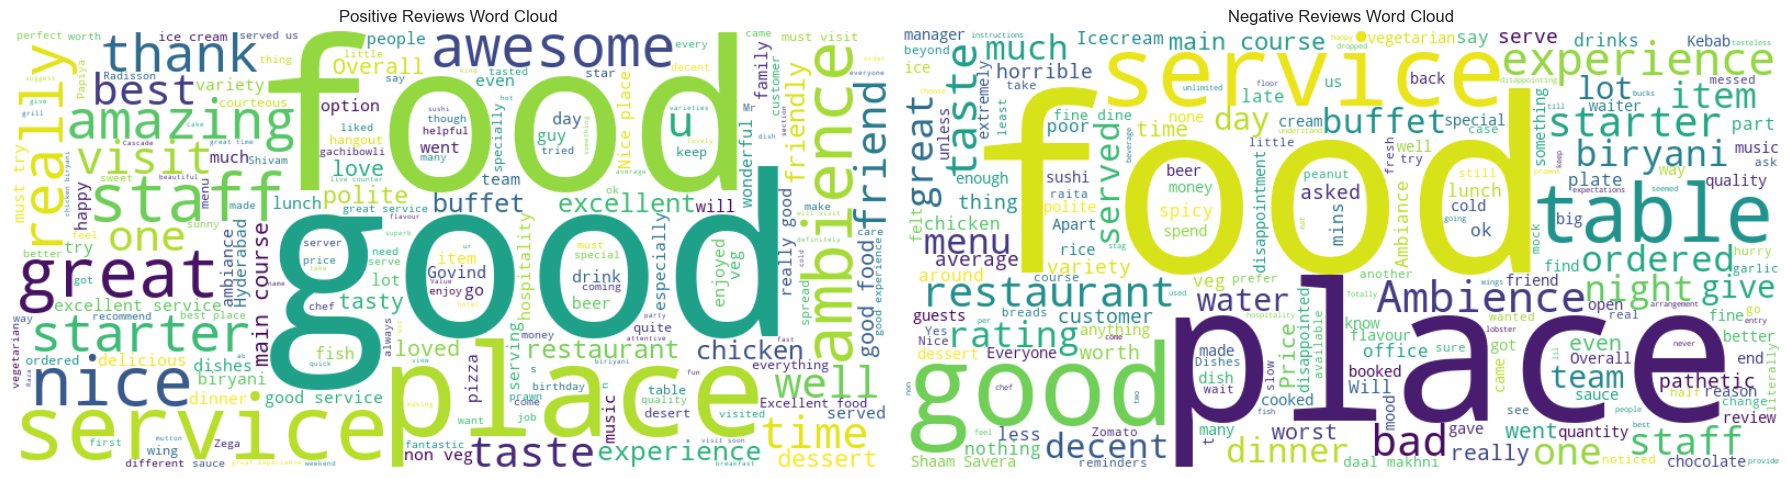

In [110]:
# Combine reviews by sentiment type
positive_reviews = " ".join(top_10_restaurant_reviews[top_10_restaurant_reviews['content_polarity_vader'] > 0.5]['Review'])
negative_reviews = " ".join(top_10_restaurant_reviews[top_10_restaurant_reviews['content_polarity_vader'] < -0.5]['Review'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display both word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Create a grid with 1 row and 2 columns

# Plot the positive word cloud
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Positive Reviews Word Cloud")

# Plot the negative word cloud
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Negative Reviews Word Cloud")

# Adjust layout
plt.tight_layout()
plt.show()

It seems that, for the top 10 best restaurants, clients tend to appreciate the food, service, and ambiance the most, but still critique the place and the staff. Interestingly, people also compliment and complain about the same aspects, such as the food and service. This makes sense, although we expected that for the best restaurants, the reviews would be more consistently positive across all areas, with fewer mentions of room for improvement.

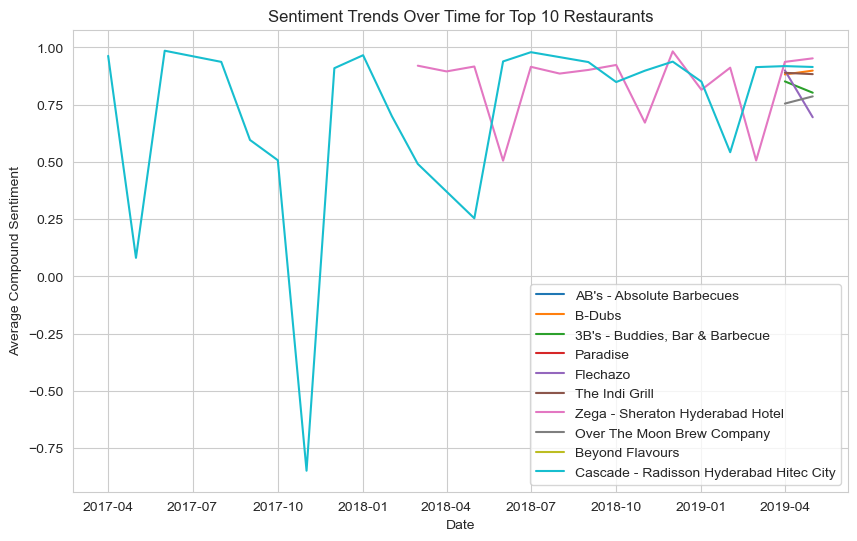

In [111]:
reviews_subset = reviews[['Review', 'Restaurant', 'Time']]

top_10_restaurant_reviews = top_10_restaurant_reviews.merge(reviews_subset, on=['Review', 'Restaurant'], how='left')


top_10_restaurant_reviews['Time'] = pd.to_datetime(top_10_restaurant_reviews['Time']) # Convert 'Time' to datetime format
top_10_restaurant_reviews['Date'] = top_10_restaurant_reviews['Time'].dt.date # Extract date (ignore time)
top_10_restaurant_reviews['Date'] = pd.to_datetime(top_10_restaurant_reviews['Date']) # Convert 'Date' back to datetime for plotting

# Group sentiment scores by restaurant and date (monthly)
sentiment_over_time = top_10_restaurant_reviews.groupby(
    ['Restaurant', top_10_restaurant_reviews['Date'].dt.to_period('M')])['content_polarity_vader'].mean().reset_index()

# Convert 'Date' back to timestamp for plotting
sentiment_over_time['Date'] = sentiment_over_time['Date'].dt.to_timestamp()

# Plot sentiment trends over time for each restaurant
plt.figure(figsize=(10, 6))
for restaurant in top_10_restaurant_names:
    data = sentiment_over_time[sentiment_over_time['Restaurant'] == restaurant]
    plt.plot(data['Date'], data['content_polarity_vader'], label=restaurant)

plt.xlabel("Date")
plt.ylabel("Average Compound Sentiment")
plt.title("Sentiment Trends Over Time for Top 10 Restaurants")
plt.legend(loc="best")
plt.show()


The sentiment trends reveal high variability over time, particularly for Cascade - Radisson Hyderabad Hitec City, which fluctuates sharply, suggesting inconsistent customer experiences. In contrast, restaurants like Zega and Paradise maintain consistently positive sentiment. Most restaurants exhibit upward sentiment trends toward 2019, indicating overall improving customer satisfaction.

In [116]:
mm = MinMaxScaler(feature_range=(-1,1))
reviews_scaled['Scaled_Rating_2'] = mm.fit_transform(reviews_scaled[['Rating']])

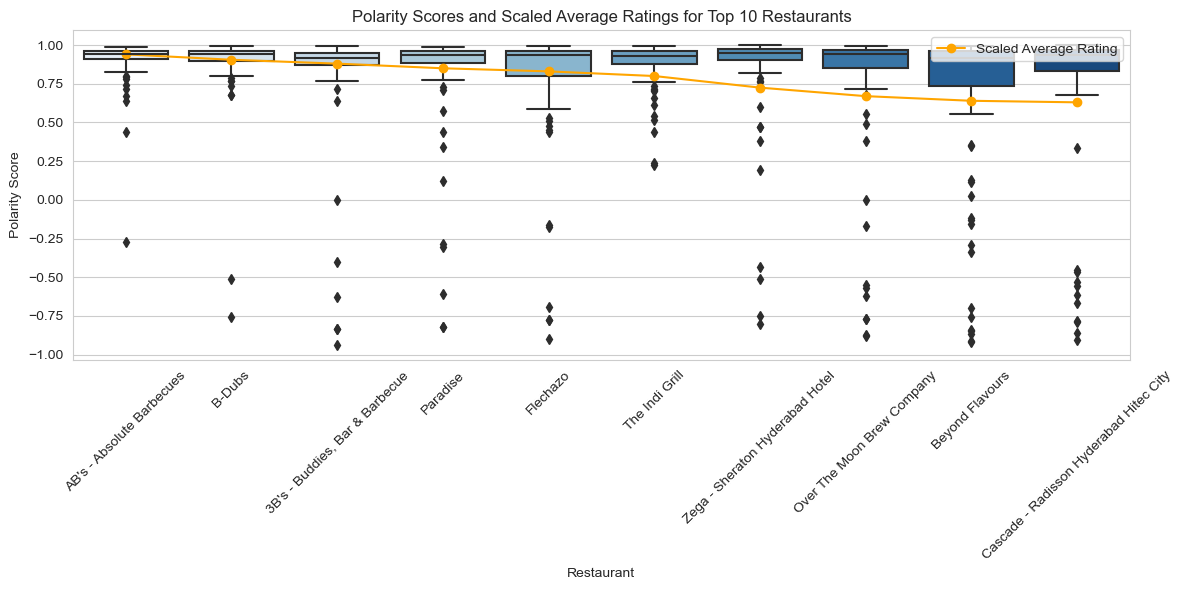

In [121]:
top_10_restaurants = top_10_scaled_restaurants.sort_values(by='avg_scaled_rating', ascending=False)

plt.figure(figsize=(12, 6))

# Create the box plot for polarity scores
sns.boxplot(
    x='Restaurant', 
    y='content_polarity_vader', 
    data=reviews_content, 
    order=top_10_restaurants['Restaurant'],  # Use restaurant names directly from the dataframe
    palette="Blues"
)

# Calculate average scaled ratings for overlay
average_scaled_ratings = reviews_scaled.groupby('Restaurant')['Scaled_Rating_2'].mean()

# Overlay the average scaled ratings as a line
x_positions = range(len(top_10_restaurants))  # Numeric positions of restaurants
plt.plot(
    x_positions, 
    average_scaled_ratings[top_10_restaurants['Restaurant']],  # Ensure correct order of restaurants
    marker='o', 
    linestyle='-', 
    color='orange', 
    label='Scaled Average Rating'
)

plt.title("Polarity Scores and Scaled Average Ratings for Top 10 Restaurants")
plt.xlabel("Restaurant")
plt.ylabel("Polarity Score")
plt.legend(loc="upper right")
plt.xticks(x_positions, top_10_restaurants['Restaurant'], rotation=45)  # Set x-axis labels to restaurant names

plt.tight_layout()
plt.show()


We can observe that most restaurants exhibit positive polarity scores with relatively small variability, though outliers are present. These represent several instances of low-polarity high-rating reviews and high-polarity low-rating reviews. The scaled average ratings align closely with the sentiment polarity distributions, reflecting a general consistency between review sentiments and customer ratings. However, for lower average ratings, the sentiment scores by VADER returned higher polarity.

**Top 10 Worst Restaurants Analysis**

The previous study was also performed for the 10 worst restaurants.

In [136]:
top_10_worst_restaurants = top_restaurants.sort_values(by='avg_rating', ascending=True).head(10)
top_10_worst_scaled_restaurants = scaled_top_restaurants.sort_values(by='avg_scaled_rating', ascending=True).head(10)

top_10_worst_scaled_restaurants

Restaurant  avg_scaled_rating
41                       Hotel Zara Hi-Fi            -0.3000
10                         Asian Meal Box            -0.2100
66                          Pakwaan Grand            -0.1450
57                          Mathura Vilas            -0.0900
14                        Behrouz Biryani            -0.0875
78  Shree Santosh Dhaba Family Restaurant            -0.0850
83                     The Chocolate Room            -0.0850
47                                    KFC            -0.0750
21                             Club Rogue            -0.0600
26                             Desi Bytes            -0.0500

In [137]:
top_10_worst_restaurant_names = top_10_worst_restaurants['Restaurant'].tolist()
top_10_worst_reviews = reviews_content[reviews_content['Restaurant'].isin(top_10_worst_restaurant_names)]
top_10_worst_reviews.sample(5)

Review  Rating  \
3345  1. Bollywood music starts only after 10.30 pm....     1.0   
1708  I ordered Afghani chicken from here but I got ...     1.0   
5441  Ordered 1 veg fried rice and chilli potato wit...     2.0   
3364  I am thinking where to start, there were so ma...     1.0   
5457  I like the combos they offer and the quality a...     3.0   

            Restaurant  Weekend  Post_Meal  \
3345        Club Rogue        1          0   
1708  Hotel Zara Hi-Fi        0          1   
5441    Asian Meal Box        0          1   
3364        Club Rogue        0          1   
5457    Asian Meal Box        0          1   

                                        preproc_content  \
3345  1 . Bollywood music starts 10.30 pm . Not fall...   
1708  ordered Afghani chicken but got Curry chicken ...   
5441  Ordered 1 veg fried rice chilli potato steam r...   
3364  thinking start, many bad experiences place 2-3...   
5457  like combos offer quality quantity food way se...   

                                    tokenized_sentences  \
3345  [1., Bollywood music starts 10.30 pm., Not fal...   
1708  [ordered Afghani chicken but got Curry chicken...   
5441  [Ordered 1 veg fried rice chilli potato steam ...   
3364  [thinking start, many bad experiences place 2-...   
5457  [like combos offer quality quantity food way s...   

      content_polarity_vader  mean_sentence_polarity_vader  \
3345                  0.8013                      0.045431   
1708                 -0.7572                     -0.757200   
5441                  0.7254                      0.381867   
3364                 -0.9801                     -0.222873   
5457                  0.8634                      0.306100   

      content_polarity_textblob  mean_sentence_polarity_textblob  \
3345                   0.048039                         0.055208   
1708                  -0.650000                        -0.650000   
5441                  -0.038333                        -0.053472   
3364                  -0.126871                        -0.089623   
5457                   0.239583                         0.172222   

      normalized_polarity_vader  normalized_score  \
3345                   0.900482              0.00   
1708                   0.118338              0.00   
5441                   0.862391              0.25   
3364                   0.006474              0.00   
5457                   0.931647              0.50   

      normalized_polarity_textblob  \
3345                      0.524020   
1708                      0.175000   
5441                      0.480833   
3364                      0.436565   
5457                      0.619792   

                                     initial_bow_vector  Scaled_Rating_2  
3345  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             -1.0  
1708  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             -1.0  
5441  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             -0.5  
3364  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             -1.0  
5457  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0.0

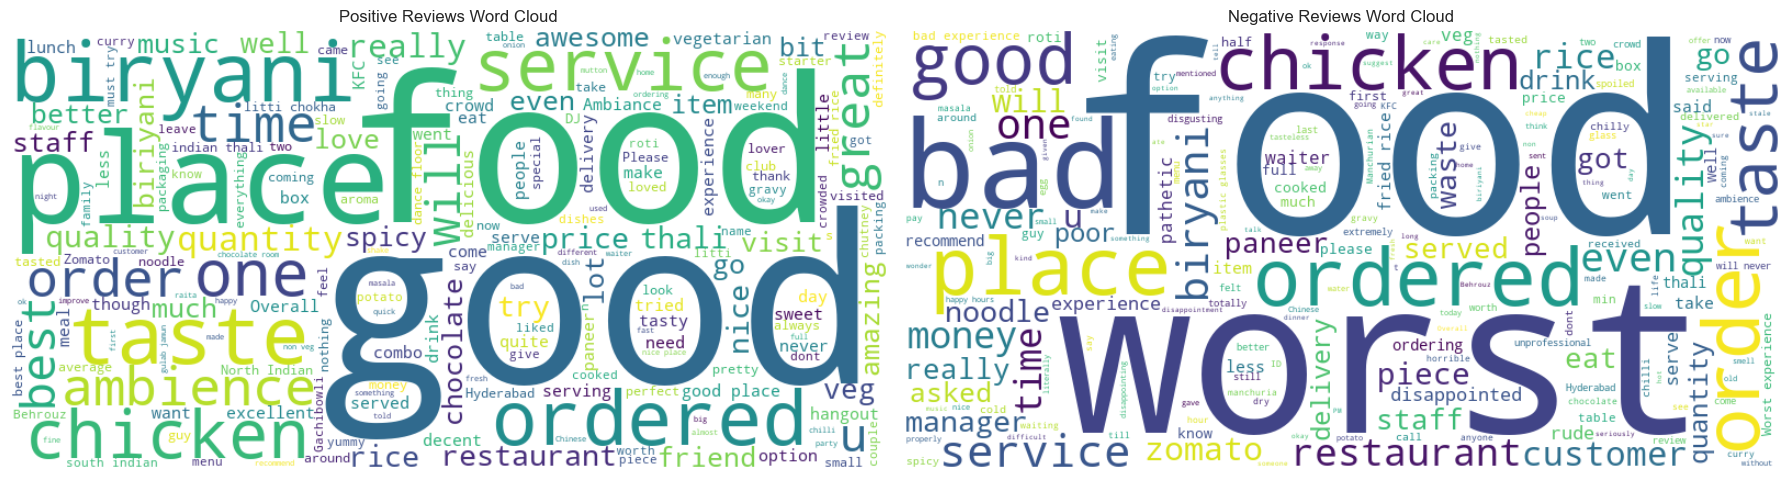

In [138]:
# Combine reviews by sentiment type
positive_reviews = " ".join(top_10_worst_reviews[top_10_worst_reviews['content_polarity_vader'] > 0.5]['Review'])
negative_reviews = " ".join(top_10_worst_reviews[top_10_worst_reviews['content_polarity_vader'] < -0.5]['Review'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display both word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Create a grid with 1 row and 2 columns

# Plot the positive word cloud
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Positive Reviews Word Cloud")

# Plot the negative word cloud
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Negative Reviews Word Cloud")

# Adjust layout
plt.tight_layout()
plt.show()

Unlike the top 10 best restaurants, the reviews for the 10 worst restaurants feature a wider variety of words. While clients often praise typical aspects, they also express significant dissatisfaction, as evidenced by the frequent appearance of words like "bad" and "worst," which are the most prominent terms in the reviews.

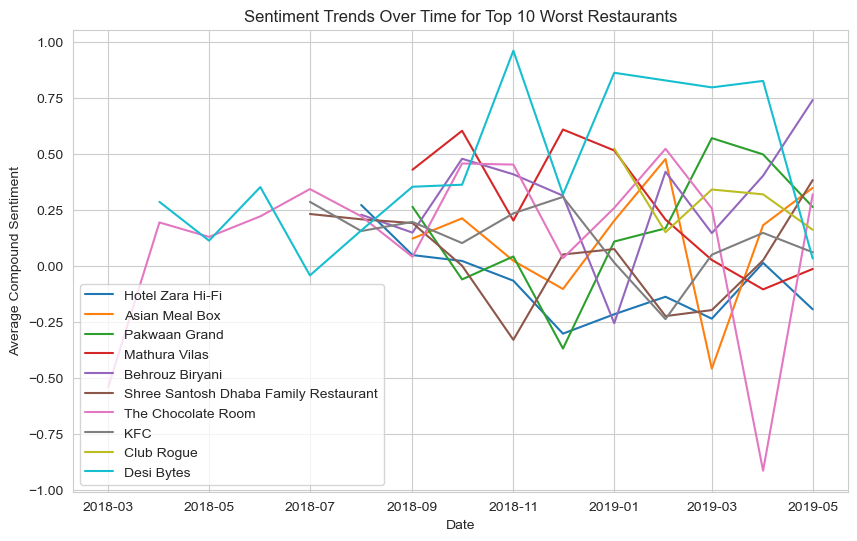

In [139]:
reviews_subset = reviews[['Review', 'Restaurant', 'Time']]
top_10_worst_reviews = top_10_worst_reviews.merge(
    reviews_subset, on=['Review', 'Restaurant'], how='left')


top_10_worst_reviews['Time'] = pd.to_datetime(top_10_worst_reviews['Time']) # Convert 'Time' to datetime format
top_10_worst_reviews['Date'] = top_10_worst_reviews['Time'].dt.date # Extract date (ignore time)
top_10_worst_reviews['Date'] = pd.to_datetime(top_10_worst_reviews['Date']) # Convert 'Date' back to datetime for plotting

# Group sentiment scores by restaurant and date (monthly)
sentiment_over_time_worst = top_10_worst_reviews.groupby(
    ['Restaurant', top_10_worst_reviews['Date'].dt.to_period('M')]
)['content_polarity_vader'].mean().reset_index()

# Convert 'Date' back to timestamp for plotting
sentiment_over_time_worst['Date'] = sentiment_over_time_worst['Date'].dt.to_timestamp()

# Plot sentiment trends over time for each restaurant (worst ones)
plt.figure(figsize=(10, 6))
for restaurant in top_10_worst_restaurant_names:
    data = sentiment_over_time_worst[sentiment_over_time_worst['Restaurant'] == restaurant]
    plt.plot(data['Date'], data['content_polarity_vader'], label=restaurant)

plt.xlabel("Date")
plt.ylabel("Average Compound Sentiment")
plt.title("Sentiment Trends Over Time for Top 10 Worst Restaurants")
plt.legend(loc="best")
plt.show()

While some restaurants show slight improvements, others, like "Asian Meal Box," experience sharp declines at specific points, such as May 2019. These significant dips may be linked to events like poor service or food quality issues.

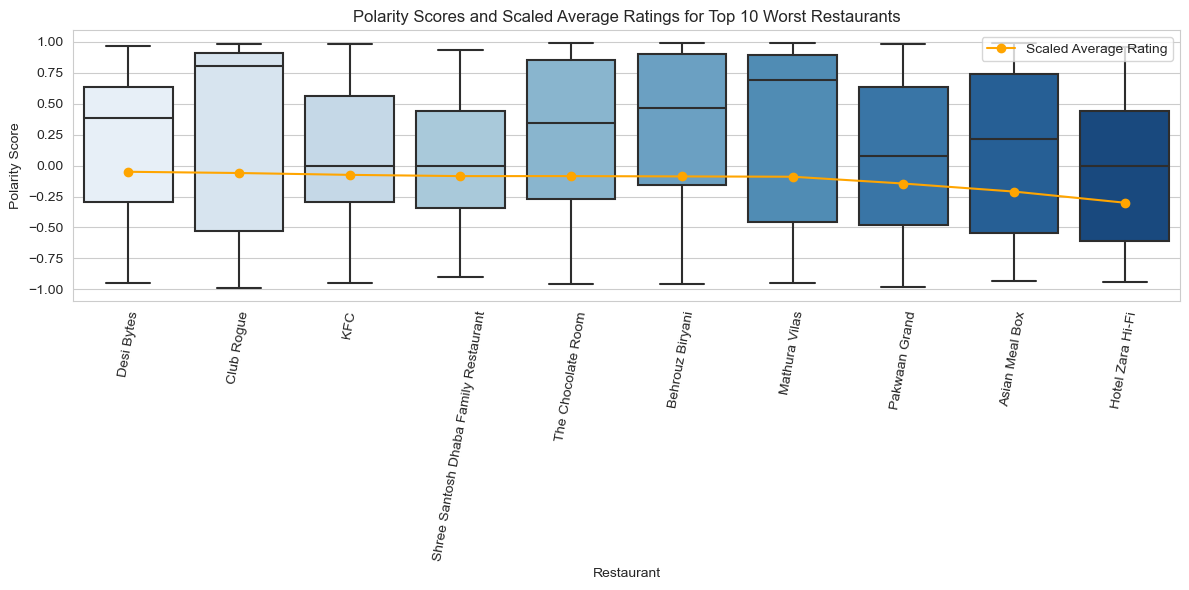

In [140]:
# Ensure top_10_restaurants is sorted properly by avg_scaled_rating
top_10_restaurants = top_10_worst_scaled_restaurants.sort_values(by='avg_scaled_rating', ascending=False)

plt.figure(figsize=(12, 6))

# Create the box plot for polarity scores
sns.boxplot(
    x='Restaurant', 
    y='content_polarity_vader', 
    data=reviews_content, 
    order=top_10_restaurants['Restaurant'],  # Use restaurant names directly from the dataframe
    palette="Blues"
)

# Calculate average scaled ratings for overlay
average_scaled_ratings = reviews_scaled.groupby('Restaurant')['Scaled_Rating_2'].mean()

# Overlay the average scaled ratings as a line
x_positions = range(len(top_10_restaurants))  # Numeric positions of restaurants
plt.plot(
    x_positions, 
    average_scaled_ratings[top_10_restaurants['Restaurant']],  # Ensure correct order of restaurants
    marker='o', 
    linestyle='-', 
    color='orange', 
    label='Scaled Average Rating'
)

# Customize plot
plt.title("Polarity Scores and Scaled Average Ratings for Top 10 Worst Restaurants")
plt.xlabel("Restaurant")
plt.ylabel("Polarity Score")
plt.legend(loc="upper right")
plt.xticks(x_positions, top_10_restaurants['Restaurant'], rotation=80)  # Set x-axis labels to restaurant names
plt.tight_layout()

# Display the plot
plt.show()

The box plot displays the distribution of polarity scores (sentiment analysis) for reviews of the top 10 restaurants, with higher scores indicating positive reviews and lower scores indicating negative ones. The scaled average ratings, shown by the orange line, offer a comparative view of customer satisfaction. Notably, Club Rogue has the widest positive polarity distribution, suggesting diverse opinions, while restaurants like "Mathura Vilas" show more consistent sentiment. "Hotel Zara Hi-Fi" appears to have a predominantly negative polarity and a lower scaled average rating. Despite this, the overall polarity is still higher than the average rating, indicating a slight discrepancy between sentiment and customer satisfaction.

Overall, it appears that the Rating is closely aligned with the polarity, reflecting the overall sentiment of the reviews.

<font color='#BFD72F' size=4>1.5.4 By defined Flags</font> <a class="anchor" id="P15"></a>

In this section, we thought it would be interesting to examine whether the polarity of reviews differs depending on the Weekend and Post_Meal flags.

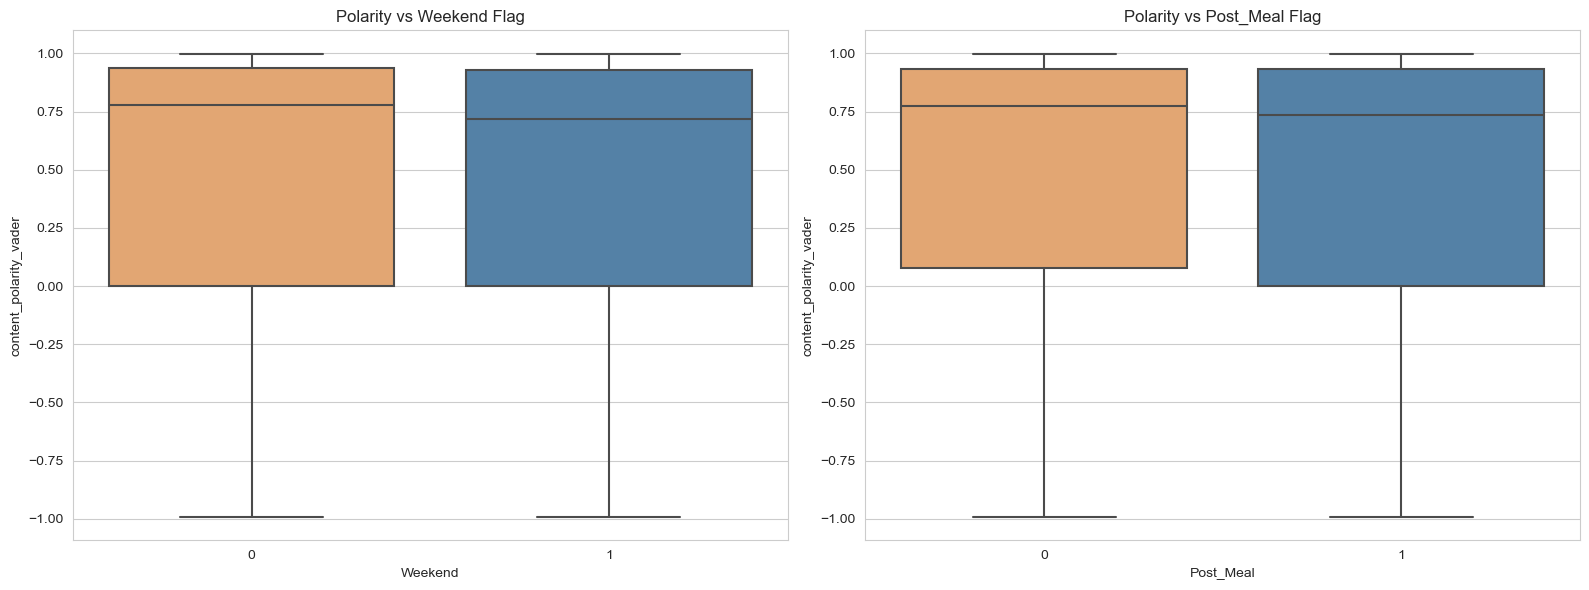

In [143]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# Box plot for Weekend flag (subplot 1)
plt.subplot(1, 2, 1)
sns.boxplot(x='Weekend', y='content_polarity_vader', palette=['sandybrown','steelblue'] ,data=reviews_content)
plt.title('Polarity vs Weekend Flag')

# Box plot for Post_Meal flag (subplot 2)
plt.subplot(1, 2, 2)
sns.boxplot(x='Post_Meal', y='content_polarity_vader', palette=['sandybrown','steelblue'], data=reviews_content)
plt.title('Polarity vs Post_Meal Flag')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [144]:
# Calculate correlation between polarity and flags
correlation_weekend = reviews_content['Weekend'].corr(reviews_content['content_polarity_vader'])
correlation_post_meal = reviews_content['Post_Meal'].corr(reviews_content['content_polarity_vader'])
correlation_weekend_rating = reviews_content['Weekend'].corr(reviews_content['Rating'])
correlation_post_meal_rating = reviews_content['Post_Meal'].corr(reviews_content['Rating'])

print(f"Correlation between Weekend flag and Polarity: {correlation_weekend}")
print(f"Correlation between Post_Meal flag and Polarity: {correlation_post_meal}")
print(f"Correlation between Weekend flag and Rating: {correlation_weekend_rating}")
print(f"Correlation between Post_Meal flag and Rating: {correlation_post_meal_rating}")

Correlation between Weekend flag and Polarity: -0.025554094084269414
Correlation between Post_Meal flag and Polarity: -0.02511505471245683
Correlation between Weekend flag and Rating: -0.01237869799472857
Correlation between Post_Meal flag and Rating: 0.011741724853823653


We can conclude that there is little correlation between polarity and the defined flags, suggesting that these flags have minimal influence on the polarity of the reviews.

<font color='#BFD72F' size=5>1.6 Modeling</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

As an additional step, we developed a predictive model to explore whether the polarity of reviews could effectively estimate a restaurant's rating.

In [148]:
# Normalize sentiment and Zomato scores
scaler = MinMaxScaler()
merged_data['normalized_polarity'] = scaler.fit_transform(merged_data[['content_polarity_vader']])
merged_data['normalized_score'] = scaler.fit_transform(merged_data[['Rating']])

# Prepare data for modeling
x = merged_data[['normalized_polarity']]  # Polarity as the input feature
y = merged_data['normalized_score']  # Zomato rating as the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test + 1, y_pred + 1)  # Adding 1 to avoid zero in MAPE calculation
coef = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: Rating = {coef:.3f}*Polarity + {intercept:.3f}")
print(f"RMSE: {rmse:.3f}; MAPE: {mape:.3f}")

Linear Regression Equation: Rating = 0.889*Polarity + -0.003
RMSE: 0.264; MAPE: 0.144


The model demonstrates a strong positive relationship between polarity and ratings, with reasonable predictive accuracy (RMSE: 0.264, MAPE: 14.4%), though other factors likely influence ratings beyond polarity alone.

<font color='#BFD72F' size=5>1.7 Conclusion</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

We can conclude that there is a moderate relationship between the polarity of a restaurant's reviews and its Zomato score. The polarity, which reflects the sentiment expressed in the reviews, tends to align with the rating—higher polarity usually corresponds to higher scores and vice versa. While this suggests that polarity can serve as a useful input for predicting a restaurant's Zomato score, the presence of exceptions indicates that other factors beyond sentiment play a role in determining the rating. Factors like price and cuisine type, as we saw, also influence the polarity of reviews, impacting the overall rating. Therefore, while polarity can provide valuable insight, it is likely not sufficient on its own for highly accurate predictions, and additional variables should be considered for a more comprehensive model.